In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the databases that we need


In [3]:
# loading in statistics for college players
college_stats = pd.read_csv('all_college_data.csv')

# removing college players that were not drafted
college_stats = college_stats[college_stats['Pick'].notna()]

# dropping all the coloumns that are not going to be used in estimation
cols = ['Player', 'Pick', 'GP', 'MPG', 'WS', 'ORB', 'DRB', 'APG', 'BPG', 'SPG', 'FTM', 'FT%', '3PM', '3P%', 'TS%', 'TOV', 'eFG%', 'ORtg', 'DRtg']
college_stats = college_stats[cols]

# loading in career stats for NBA
# these include averages of culmulative season from 2009 to 2021
# not exactly career averages, but a good enough span for young players
nba_stats = pd.read_csv('NBA_data.csv')

# removing all columns except Player efficiency rating (PER) which is our target
nba_stats = nba_stats[['Player', 'PER']]

# joining college stats on player Name to add target of PER
data = college_stats.set_index('Player').join(nba_stats.set_index('Player'))
data.reset_index(inplace=True)


# making sure we have a PER for every player in our data set, remove those who don't 
data = data[data['PER'].notna()]
data = data.sort_values(by=['Player'])

data.describe()

Pick          GP         MPG          WS         ORB         DRB  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean    24.838710   34.239247   31.735215    4.203226    1.998118    4.700457   
std     15.529671    2.997621    3.568275    3.771676    1.045037    1.666785   
min      1.000000   22.000000   19.100000   -0.400000    0.170000    1.700000   
25%     11.000000   32.000000   30.000000    1.200000    1.100000    3.400000   
50%     24.000000   34.000000   32.000000    3.550000    2.000000    4.500000   
75%     37.000000   37.000000   34.125000    6.300000    2.700000    5.800000   
max     60.000000   41.000000   38.400000   19.200000    5.700000   10.500000   

              APG         BPG         SPG         FTM         FT%         3PM  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     2.452608    1.013871    1.221290    3.700565    0.732871    1.091048   
std      1.627153    0.907953    0.526435    1.414923    0.090734    0.933787   
min      0.200000    0.000000    0.200000    0.760000    0.295000    0.000000   
25%      1.300000    0.300000    0.800000    2.700000    0.676750    0.200000   
50%      1.900000    0.800000    1.200000    3.500000    0.742500    0.900000   
75%      3.225000    1.400000    1.600000    4.600000    0.799250    1.900000   
max      9.750000    5.400000    3.000000    8.700000    0.974000    3.900000   

              3P%         TS%         TOV        eFG%        ORtg        DRtg  \
count  372.000000  368.000000  372.000000  368.000000  368.000000  368.000000   
mean     0.312237    0.586359    2.321183    0.548288  117.243207   94.011685   
std      0.160687    0.044760    0.631981    0.045582    7.432751    6.892420   
min      0.000000    0.488000    0.700000    0.423000   96.400000   54.300000   
25%      0.277500    0.558000    1.860000    0.515000  112.200000   89.450000   
50%      0.346000    0.582000    2.280000    0.547500  116.600000   94.000000   
75%      0.398000    0.616000    2.700000    0.577000  121.625000   98.325000   
max      1.000000    0.948000    4.400000    0.671000  140.500000  136.200000   

              PER  
count  372.000000  
mean    24.120161  
std      4.297764  
min      9.500000  
25%     21.100000  
50%     23.900000  
75%     27.000000  
max     42.300000

Cleaning the Data

In [4]:
# filling in means for NaN values in stats
# not many NaN values, because we are taking drafted players only(i.e. high value players, which typically have complete statistics)
# therefore mean is appropriate

# we do not do this for picks over PER cause we already filter out NaN values for them
cols_to_adjust = cols[2:]


for col in cols_to_adjust:
   data[col] = data[col].fillna(data[col].mean())

data.describe() # cleaned data

Pick          GP         MPG          WS         ORB         DRB  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean    24.838710   34.239247   31.735215    4.203226    1.998118    4.700457   
std     15.529671    2.997621    3.568275    3.771676    1.045037    1.666785   
min      1.000000   22.000000   19.100000   -0.400000    0.170000    1.700000   
25%     11.000000   32.000000   30.000000    1.200000    1.100000    3.400000   
50%     24.000000   34.000000   32.000000    3.550000    2.000000    4.500000   
75%     37.000000   37.000000   34.125000    6.300000    2.700000    5.800000   
max     60.000000   41.000000   38.400000   19.200000    5.700000   10.500000   

              APG         BPG         SPG         FTM         FT%         3PM  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     2.452608    1.013871    1.221290    3.700565    0.732871    1.091048   
std      1.627153    0.907953    0.526435    1.414923    0.090734    0.933787   
min      0.200000    0.000000    0.200000    0.760000    0.295000    0.000000   
25%      1.300000    0.300000    0.800000    2.700000    0.676750    0.200000   
50%      1.900000    0.800000    1.200000    3.500000    0.742500    0.900000   
75%      3.225000    1.400000    1.600000    4.600000    0.799250    1.900000   
max      9.750000    5.400000    3.000000    8.700000    0.974000    3.900000   

              3P%         TS%         TOV        eFG%        ORtg        DRtg  \
count  372.000000  372.000000  372.000000  372.000000  372.000000  372.000000   
mean     0.312237    0.586359    2.321183    0.548288  117.243207   94.011685   
std      0.160687    0.044518    0.631981    0.045336    7.392573    6.855163   
min      0.000000    0.488000    0.700000    0.423000   96.400000   54.300000   
25%      0.277500    0.558000    1.860000    0.515750  112.200000   89.500000   
50%      0.346000    0.582500    2.280000    0.548144  116.600000   94.011685   
75%      0.398000    0.616000    2.700000    0.576250  121.600000   98.300000   
max      1.000000    0.948000    4.400000    0.671000  140.500000  136.200000   

              PER  
count  372.000000  
mean    24.120161  
std      4.297764  
min      9.500000  
25%     21.100000  
50%     23.900000  
75%     27.000000  
max     42.300000

Correlation Matrix

In [ ]:
corr = data.corr().abs()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


# we remove pick as the goal is to determine the value of a college prospect
# therefore their draft order cannot be considered although it has a high correlation
X = data.drop(['Pick','Player', 'PER'], axis = 1)
y = data['PER']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train

Preprocessing Data

In [7]:
from sklearn import preprocessing

# defining an object of MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

# normalize values between 0 and 1 using the training data
X_train_scaled = min_max_scaler.fit_transform(X_train)
# v shape of scaled data
X_train_scaled.shape

(260, 17)

Linear Regression

In [8]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

# defining the model as an object of LinearRegression()
lin_model = linear_model.Lasso(alpha=0.1)

# fit the model on the scaled training data
lin_model.fit(X_train_scaled, y_train)

# calculate the coefficient of determination R^2
lin_model.score(X_train_scaled, y_train)

0.5619461713410905

In [9]:
# Model evaluation with normalization using test set 
min_max_scaler_2 = preprocessing.MinMaxScaler()

X_test_scaled = min_max_scaler_2.fit_transform(X_test)

# calculate the R^2 score
lin_model.score(X_test_scaled, y_test)

0.3657821341659908

In [ ]:
# calculate the predicted values for training data
y_pred_train = lin_model.predict(X_train_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Train Set")
plt.show()

In [ ]:
# calculate the predicted values for test data
y_pred_test = lin_model.predict(X_test_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Test Set")
plt.show()

Decision Tree: Grid Search but manually set the max depth to 6, yielded best result. MSE is 6.96 and r2 is 0.55

Decision Tree: Performed prunning and boosting.

**Final Results**
MSE: 7.71 
R2: 0.51

Best parameters for Decision Tree Regression: {'criterion': 'poisson', 'max_depth': 6, 'min_samples_leaf': 7, 'splitter': 'random'}
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 200}
Test set performance (R^2): 0.5077152767272556
Test set performance (MSE): 7.721739797332707


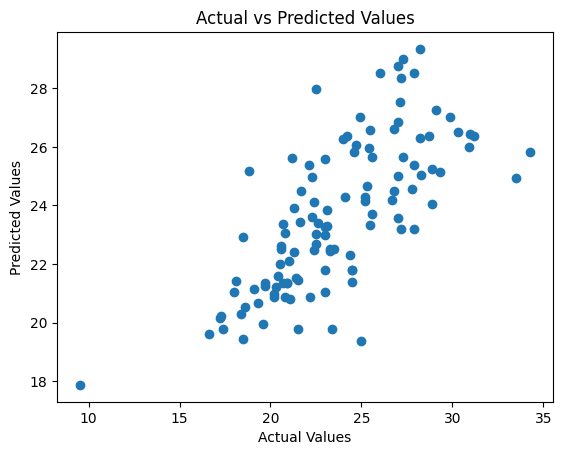

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Performs Pruning to find the best maximum depth, min sample leafs, splitter and criterion for the decision tree, using Grid Search
treePruning = DecisionTreeRegressor()
param_grid_pruning = {'max_depth': [3,4,5,6,7,8],
                          'min_samples_leaf': [2,3,4,5,6,7,8],
                          'splitter': ['best', 'random'],
                          'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']} 
grid_search = GridSearchCV(treePruning, param_grid_pruning, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Outputs the best hyperparameters and creates a new decision tree from that
print("Best parameters for Decision Tree Regression:", grid_search.best_params_)
bestTreePruning = grid_search.best_estimator_

# Performs boosting using the AdaBoost library
# Iterates over the number of estimators and the learning rate GridSearch
ada = AdaBoostRegressor(base_estimator=bestTreePruning, random_state=42)
param_grid_lda_boosting = {'n_estimators': [50,100,150,200], 'learning_rate': [0.001,0.01,0.1,1]}
grid_search = GridSearchCV(ada, param_grid_lda_boosting, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Outputs the best hyperparameters (for learning rate and number of estimators) for boosting
print("Best parameters for AdaBoost:", grid_search.best_params_)
bestTreeBoosting = grid_search.best_estimator_

# Evaluates performance of the model on test set
Y_pred_test = bestTreeBoosting.predict(X_test)
r2_lda = r2_score(y_test, Y_pred_test)
print("Test set performance (R^2):", r2_lda)
mse_lda = mean_squared_error(y_test, Y_pred_test)
print("Test set performance (MSE):", mse_lda)

# Create scatter plot of actual vs predicted values for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Decision Tree: Performed prunning and boosting. Used Random Search

**Final Results**
MSE: 7.90 
R2: 0.50

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Performs Pruning to find the best maximum depth, min sample leafs, splitter and criterion for the decision tree, using Random Search
treePruning = DecisionTreeRegressor(random_state=0)
param_grid_pruning = {'max_depth': [3,4,5,6,7,8],
                      'min_samples_leaf': [2,3,4,5,6,7,8],
                      'splitter': ['best', 'random'],
                      'criterion': ['mse', 'friedman_mse', 'mae']} 
random_search = RandomizedSearchCV(treePruning, param_distributions=param_grid_pruning, n_iter=5, cv=5, scoring='neg_mean_squared_error', random_state=0)
random_search.fit(X_train, y_train)
print("Best parameters for Decision Tree Regression:", random_search.best_params_)
treePruning = DecisionTreeRegressor(max_depth=random_search.best_params_['max_depth'], random_state=0)

# Performs boosting using the AdaBoost library
# Iterates over the number of estimators and the learning ratemodel using RandomSearch
ada = AdaBoostRegressor(base_estimator=treePruning, random_state=0)
param = {'n_estimators': [25,50,75,100,125,150,175,200], 
         'learning_rate': [0.001,0.01,0.1,1]
         }
random_search = RandomizedSearchCV(ada, param, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
print("Best parameters for AdaBoost Regression:", random_search.best_params_)

# Use the best hyperparameters to create the model
model = AdaBoostRegressor(base_estimator=treePruning, n_estimators=random_search.best_params_['n_estimators'], 
                          learning_rate=random_search.best_params_['learning_rate'], random_state=0)
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

# Print the mean squared error and R^2 score for the test set
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))

# Create scatter plot of actual vs predicted values for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Decision Tree: Performed boosting. Used Grid Search

**Final Results**
MSE: 7.35 
R2: 0.53

Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 150}
Test MSE: 7.3945
Test R^2: 0.5286


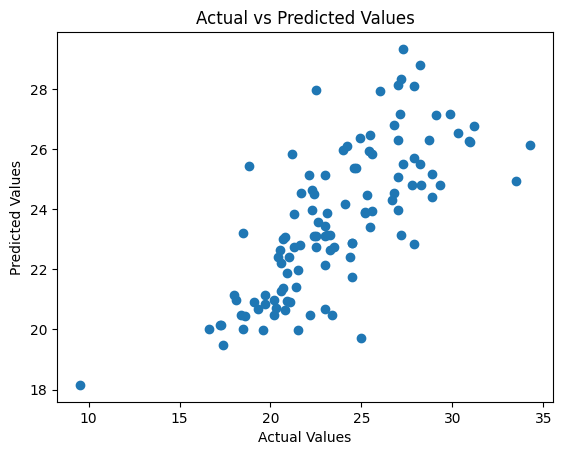

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Define the decision tree as the base estimator for boosting
clf = DecisionTreeRegressor(max_depth=5)

# Define the grid of hyperparameters to search over for AdaBoost
param_grid_boosting = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]}

# Perform grid search to find the best hyperparameters for AdaBoost
ada = AdaBoostRegressor(base_estimator=clf, random_state=42)
grid_search = GridSearchCV(ada, param_grid_boosting, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Output the best hyperparameters (for learning rate and number of estimators) for boosting
print("Best parameters for AdaBoost:", grid_search.best_params_)
bestTreeBoosting = grid_search.best_estimator_

# Evaluate performance of best model on test set
y_pred_test = bestTreeBoosting.predict(X_test)

# Print the mean squared error and R^2 score for the test set
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))

# Create scatter plot of actual vs predicted values for test set
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Decision Tree: Performed pruning only. Used Grid Search

**Final Results**
MSE: 11.28 
R2: 0.28

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Performs Pruning to find the best maximum depth, minimum sample leafs, splitter, criterion for the decision tree
treeLDAPruning = DecisionTreeRegressor()
param_grid_lda_pruning = {'max_depth': [3,4,5,6,7,8],
                          'min_samples_leaf': [2,3,4,5,6,7,8],
                          'splitter': ['best', 'random'],
                          'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']} 
grid_search = GridSearchCV(treeLDAPruning, param_grid_lda_pruning, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Outputs value and creates the new decision tree
print("Best parameters for Decision Tree Regression (LDA):", grid_search.best_params_)
bestTreePruning = grid_search.best_estimator_

# Evaluates performance of best model on test set
Y_pred_lda = bestTreePruning.predict(X_test)
r2_lda = r2_score(y_test, Y_pred_lda)
print("Test set performance (R^2):", r2_lda)
mse_lda = mean_squared_error(y_test, Y_pred_lda)
print("Test set performance (MSE):", mse_lda)


Best parameters for Decision Tree Regression (LDA): {'criterion': 'poisson', 'max_depth': 7, 'min_samples_leaf': 8, 'splitter': 'random'}
Test set performance LDA (R^2): 0.28059940151251095
Test set performance LDA (MSE): 11.28416944291021


MLP with Grid Search

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Defining the model as an object of MLPRegressor()
mlp_model = MLPRegressor(hidden_layer_sizes = (18,), activation='identity', solver='lbfgs', alpha = 0.0001, max_iter = 100, shuffle=True)

# Different combinations of hyperparameter values
param_grid = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100, 1000], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'hidden_layer_sizes': [(10,),(11,),(12,),(13,),(14,),(15,),(16,)],
              }

# Grid Search
grid = GridSearchCV(mlp_model, param_grid, refit = True, verbose = 3, scoring='neg_mean_squared_error')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting the model on the scaled training data
grid.fit(X_train_scaled, y_train)

# Getting the MSE score
print('Testing accuracy (Train): ', grid.score(X_train_scaled, y_train))
print('Validation Accuracy (Train): ', grid.best_score_)

# Getting the MSE score on test set
print('Testing accuracy (Test): ', grid.score(X_test_scaled, y_test))

# Predicted values for training data
y_pred_train = grid.predict(X=X_train_scaled)

# Predicted values for test data
y_pred_test = grid.predict(X=X_test_scaled)
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))
print("Best parameters: ", grid.best_params_)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.240 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,),

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-536.608 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-525.731 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-585.846 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.635 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.226 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.751 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.713 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.491 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-562.665 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-526.471 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-572.078 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-515.347 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-595.060 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-428.837 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-335.7

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-437.318 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-303.591 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-491.343 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-590.216 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-586.233 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-474.664 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-573.100 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-579.081 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.651 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.301 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.847 total time=   0.0

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-513.445 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-514.106 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-5.827 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.624 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.845 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.558 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.886 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-576.939 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-542.631 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-523.452 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-530.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-517.396 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-422.837 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-494.975 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-384.135 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-395.332 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-463.992 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-528.678 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-544.904 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-483.305 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-503.847 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-577.951 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.152

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.805 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.646 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.290 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.221 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.767 total time=   0.1s
[

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-546.613 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-488.759 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-549.523 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-573.670 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.353 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.837 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.878 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-597.573 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-527.326 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-524.110 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-560.964 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-594.585 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-362.761 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-419.150 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-604.902 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-479.858 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-569.583 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-542.660 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-606.980 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.146 to

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.086 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.507 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.617 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.586 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.239 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-528.912 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-535.278 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-559.132 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-477.390 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-572.909 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.831 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.371 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.497 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.488 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-571.418 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-534.805 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-494.987 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-470.878 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-618.966 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-485.89

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-483.422 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-439.806 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-354.269 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-516.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-558.466 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-564.997 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-579.601 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-517.121 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-566.362 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.379 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-548.382 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-526.239 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-539.164 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-592.653 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.153 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.099 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.620 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.238 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.674 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.208 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-607.000 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-525.522 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-541.635 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-520.890 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-589.008 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-427.84

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-354.383 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-309.001 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-341.625 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-404.626 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-601.946 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-543.220 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-534.272 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-494.355 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-579.738 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-5.950 total time

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-572.928 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-524.593 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-522.834 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.235 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.293 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.991 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.589 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.471 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-565.869 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-574.875 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-485.613 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-511.904 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-562.080 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.379

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-358.677 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-362.474 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-421.622 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-370.560 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-452.548 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-550.763 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-557.550 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-551.410 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-529.046 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-570.837 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.146 to

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-527.820 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-580.670 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-556.177 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-500.987 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-555.401 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.272 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.819 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.416 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.007 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-543.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-527.766 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-513.506 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-513.122 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-579.130 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-308.079 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-381.456 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-334.558 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-643.767 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-529.920 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-509.962 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-486.830 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-581.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.465 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.356 total ti

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-513.460 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-482.782 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-587.546 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.699 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.543 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.069 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.246 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.734 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-538.444 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-535.499 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-545.388 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-565.711 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-588.513 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-480.472 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-369.500 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-334.590 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-316.515 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-439.938 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-569.282 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-522.957 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-579.233 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-475.506 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-565.165 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.752 tot

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-595.752 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-517.026 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-585.268 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-582.833 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-546.204 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.675 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.230 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.347 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-5.066 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.540 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-574.148 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-560.591 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-530.018 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-534.793 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-591.186 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-450.432 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-332.936 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-434.404 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-403.124 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-480.220 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-559.240 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-593.764 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-577.773 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-525.738 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-551.527 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.37

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-583.808 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-548.916 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-502.870 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-544.461 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.059 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.747 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.378 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.284 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.311 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-545.532 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-502.998 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-535.016 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-553.639 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-560.765 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-424.361 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-412.009 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-326.587 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-410.092 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-547.525 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-566.862 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-528.597 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-514.547 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-609.003 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.283 tot

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-563.488 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-455.433 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-564.621 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.392 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.759 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.902 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.595 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.049 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-562.004 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-500.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-517.036 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-556.840 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-568.171 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-423.187 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-315.072 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-444.229 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-360.437 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-394.329 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-566.416 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-561.568 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-521.424 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-560.022 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-624.215 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.348 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.106 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.407 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-4.572 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.617 total time=   

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-581.072 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-494.567 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-554.337 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-486.920 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-587.652 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.236 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.107 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.507 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.150 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.341 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-551.557 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-552.362 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-573.445 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-515.667 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-558.203 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-389.271 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-381.684 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-359.158 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-562.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-536.749 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-544.974 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-466.439 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-565.749 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-494.440 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-484.569 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 to

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.855 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.176 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.410 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.446 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.333 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-531.239 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-522.632 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-508.584 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-513.468 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-499.069 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-402.560 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-331.551 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-382.819 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-293.078 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-401.326 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-500.829 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-510.888 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-523.929 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-557.767 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-576.227 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.37

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-505.568 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-535.675 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-522.370 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-581.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.925 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.614 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.953 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.761 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.516 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-603.242 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-542.505 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-508.011 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-499.557 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.688 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-403.387 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-415.098 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-414.185 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-518.783 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-518.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-504.888 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-508.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-572.115 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.374 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-581.352 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-582.623 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-562.220 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-557.029 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-575.349 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.186 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.711 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.928 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.312 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.620 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-614.880 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-592.859 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-522.582 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-549.049 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-577.318 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-473.74

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-361.000 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-472.294 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-365.595 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-480.581 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-516.434 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-570.618 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-570.145 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-527.907 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-598.487 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.120 total time

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-511.560 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-510.405 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-616.950 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.179 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.872 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.495 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.553 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.843 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-570.896 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-524.918 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-565.505 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-473.143 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-598.542 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-430.714 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-390.790 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-420.923 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-372.297 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-477.240 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-562.982 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-552.892 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-574.181 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-555.997 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-560.087 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.234 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.838 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.582 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.241 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-482.846 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-558.713 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.477 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.118 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.017 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.234 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.885 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-519.397 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-552.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-616.764 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-499.562 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-515.755 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-406.793 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-454.098 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-452.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-394.411 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-433.729 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-539.105 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-552.042 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-511.974 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-496.471 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-539.762 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.151 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.181 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.275 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.208 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.384 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.729 total time=   0.0s
[C

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-514.699 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-529.197 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.377 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.023 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.342 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.580 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.171 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-554.683 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-546.590 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-534.711 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-478.970 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-590.188 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.379

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-426.577 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-465.437 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-437.625 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-390.068 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-367.556 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-588.022 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-611.717 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-520.498 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-511.137 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-512.267 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.379 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-554.451 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-523.011 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-510.650 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-468.182 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-556.783 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.262 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.195 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.219 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.588 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-590.058 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-529.418 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-517.649 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-493.038 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-536.984 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-460.06

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-267.570 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-375.487 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-315.935 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-468.175 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-526.728 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-532.880 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-528.085 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-558.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-571.825 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.432 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.151 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.169 total time

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-528.805 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-491.689 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-530.998 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-468.322 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-540.547 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.239 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.088 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.971 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.359 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.367 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-515.778 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-572.046 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-535.733 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-514.951 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-564.512 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.378

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-386.544 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-455.341 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-366.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-367.265 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-521.460 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-502.486 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-488.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-541.854 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-558.815 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.379 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-555.820 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-593.357 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-501.219 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-554.192 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.152 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.378 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.944 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.947 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.299 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.359 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.952 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-538.619 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-521.676 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-569.607 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-493.793 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-553.253 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-399.91

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-395.479 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-414.787 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-308.638 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-299.574 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-515.353 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-523.787 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-543.105 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 4/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-492.026 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-542.106 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.055 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.438 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.173 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.140 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.363 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.056 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.291 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.764 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-5.805 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.809 total time=   0.1s
[CV 1/5] END act

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-537.130 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-503.164 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.058 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.436 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.143 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.371 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-5.993 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.706 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.486 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.738 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.304 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-584.773 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-529.148 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-519.571 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-560.709 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-543.153 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.057 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.426 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.179 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.145 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.372 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-423.213 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-389.861 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-454.706 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-447.284 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-452.222 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-584.464 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-566.616 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-541.671 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-475.327 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-541.883 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.046 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.434 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.185 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.357 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.827 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.766 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.820 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.403 total time=   0.0s
[CV 5/5] END a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-510.562 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-489.822 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-542.751 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.060 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.429 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.145 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.368 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.604 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.095 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.770 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.679 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.850 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-610.596 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-584.374 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-506.721 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-486.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-507.637 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.059 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.430 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.149 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.140 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.374 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-445.757 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-466.780 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-323.111 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-441.788 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-367.350 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-596.994 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-563.591 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-518.467 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-539.829 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-577.613 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.047 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.434 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.138 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.140 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.362 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.963 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.710 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.758 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.224 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.670 total time=   0.0s
[CV 1/5] END act

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-508.856 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-615.940 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.066 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.145 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.144 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.372 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.132 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.075 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.999 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.538 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.565 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-616.349 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-542.769 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-552.348 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-526.536 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-576.717 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.060 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.435 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.172 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.139 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.351 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-439.719 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-347.693 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-438.442 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-404.341 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-340.121 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-565.391 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-527.779 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-541.807 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-467.517 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-518.936 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.059 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.436 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.122 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.145 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.367 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.123 total time=   0.1s
[CV 2

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-599.146 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-512.603 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-543.739 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-568.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.063 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.430 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.161 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.142 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.362 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.113 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.997 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.941 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.489 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.395 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-547.111 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-526.941 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-559.586 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-496.100 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-617.080 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.061 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.435 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.155 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.142 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.373 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-412.957 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-378.977 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-452.454 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-401.134 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-423.521 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-504.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-531.193 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-522.608 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-529.033 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-617.611 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.060 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.443 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.174 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.145 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.369 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.706 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.697 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.699 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-5.938 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.837 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-564.559 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-557.597 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-543.125 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-537.687 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-575.885 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.047 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.431 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.173 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.149 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.368 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.009 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.035 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.576 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.178 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-560.756 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-535.828 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-549.538 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-512.709 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-557.131 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.058 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.438 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.136 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.141 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.379 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-517.122 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-506.115 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-380.161 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-391.338 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-445.722 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-570.329 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-520.201 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-501.041 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-512.927 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-585.055 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.054 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.418 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.156 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.140 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.363 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.310 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.338 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.662 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-3.940 total time=   0.0s
[CV 5/5] END a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-488.840 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-512.541 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-611.139 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.052 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.434 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.159 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.372 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.192 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.646 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.586 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.593 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-555.124 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-533.729 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-546.802 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-521.047 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-568.897 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.064 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.436 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.196 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.135 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.368 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-476.466 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-441.863 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-380.195 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-390.608 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-421.307 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-545.398 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-553.692 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-555.322 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-530.446 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-580.995 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.053 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.428 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.169 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.371 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.213 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.859 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.498 total time=   0.0s
[CV 4/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-520.982 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-539.905 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-505.485 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-524.313 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.062 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.439 total time=   0.0s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.137 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.147 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.365 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.381 total time=   0.0s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.605 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.471 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.771 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.873 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-571.718 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-520.883 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-553.770 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-532.708 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-533.448 total time=   0.1s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.062 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.428 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.137 total time=   0.0s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.140 total time=   0.0s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.370 total time=   0.0s
[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-401.882 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-296.015 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-367.851 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-402.886 total time=   0.1s
[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-442.502 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-529.071 total time=   0.1s
[CV 2/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-527.793 total time=   0.1s
[CV 3/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-534.513 total time=   0.1s
[CV 4/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-485.884 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=identity, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.241 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.044 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.444 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.168 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.130 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.288 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.471 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.086 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.008 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-5.373 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.692 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-579.152 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-527.721 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-564.737 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-546.160 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-566.382 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.037 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.443 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.158 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.303 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.132 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.286 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.610 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.849 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.490 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-584.275 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-575.948 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-543.189 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-539.954 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-557.834 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.081 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.429 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.178 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.141 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.303 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-398.564 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-419.271 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-398.664 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-430.507 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-449.593 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-562.940 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-539.623 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-553.418 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-498.969 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-578.556 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.084 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.435 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.132 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.129 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.309 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.108 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.070 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.556 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.249 total time=   0.0s
[CV 5/5] END activation=iden

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-504.056 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-584.964 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.051 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.430 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.169 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.145 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.313 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.518 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.701 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.276 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.745 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.639 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-559.974 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-510.890 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-541.422 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-516.274 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-573.375 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.049 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.436 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.196 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.143 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.398 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-422.453 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-456.535 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-408.215 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-365.519 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-436.302 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-541.096 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-549.090 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-569.222 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-548.451 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-548.565 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.022 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.429 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.161 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.141 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.324 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.208 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.795 total time=   0.1s
[CV 3/5] END activation=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-510.274 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-478.372 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-525.550 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-572.698 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.040 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.439 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.170 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.144 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.304 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.226 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.202 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.874 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.935 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.253 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-618.266 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-577.079 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-577.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-488.924 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-564.098 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.037 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.444 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.174 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.143 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.329 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-446.130 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-495.897 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-426.199 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-340.147 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-346.645 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-553.741 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-624.508 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-534.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-511.600 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-550.245 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.045 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.438 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.198 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.157 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.302 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.389 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.188 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.437 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-4.854 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.804 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-614.531 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-549.221 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-556.370 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-531.664 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-562.004 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.062 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.429 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.156 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.306 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.398 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.162 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.950 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.500 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.411 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-558.116 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-559.646 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-528.830 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-488.460 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-564.475 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.077 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.413 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.151 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.146 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.324 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-369.812 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-431.060 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-416.946 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-330.613 total time=   0.1s
[CV 5/

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-592.049 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-509.922 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-502.605 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-527.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-591.667 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.051 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.452 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.164 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.159 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.357 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.103 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.764 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.722 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.028 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.337 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-528.282 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-521.160 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-465.465 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-501.734 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-554.320 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.063 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.444 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.169 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.150 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.298 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.159 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.382 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.317 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.597 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.839 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-563.627 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-499.185 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.317 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-524.298 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-531.549 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.050 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.433 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.214 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.132 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.321 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-403.653 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-379.927 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-377.219 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-362.274 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-409.282 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-565.917 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-464.985 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-468.515 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-528.246 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-545.838 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.050 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.430 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.171 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.145 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.344 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.658 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.597 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.562 total time=   0.0s
[CV 4/5] END activation=id

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-519.652 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-536.972 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-579.136 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.041 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.443 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.155 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.158 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.279 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.202 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.961 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.913 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.274 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.902 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-568.596 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-482.043 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-524.833 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-514.327 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-593.795 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.059 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.451 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.180 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.147 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.305 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-405.659 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-469.044 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-413.112 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-386.443 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-457.349 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-519.240 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-577.089 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-515.223 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-458.776 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-576.671 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.051 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.434 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.128 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.150 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.304 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.278 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.948 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.046 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-4.476 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.661 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-572.903 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-536.536 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-526.723 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-522.452 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-584.748 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.059 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.424 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.054 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.126 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.300 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.017 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.852 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.541 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.634 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.592 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-558.837 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-497.464 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-580.717 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-475.456 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.391 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.035 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.389 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.163 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.158 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.290 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-429.141 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-445.562 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-401.716 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-316.376 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-498.409 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-556.008 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-489.182 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-498.083 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-445.396 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.478 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.036 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.515 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.416 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.187 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.874 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.726 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.967 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.112 total time=   0.1s
[CV 4/5] END activ

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-533.593 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-542.844 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-538.313 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-553.694 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.041 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.518 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.434 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.192 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.874 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.265 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.772 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.874 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.948 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.240 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-540.271 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-548.643 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-564.024 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-499.550 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-516.376 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.033 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.394 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.189 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.876 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-409.760 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-398.946 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-429.330 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-380.804 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-529.607 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-550.576 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-571.324 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-573.380 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-560.072 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-518.911 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.040 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.521 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.416 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.188 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.881 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.846 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.585 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.735 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.614 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.376 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-544.094 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-520.027 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-546.824 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-484.544 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-559.044 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.041 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.524 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.456 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.191 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.893 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.852 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.393 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.642 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.489 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.892 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-588.160 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-555.454 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-499.417 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-554.756 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-566.895 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.037 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.518 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.435 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.187 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.877 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-420.257 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-361.625 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-353.135 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-362.795 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-385.584 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-526.727 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-503.055 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-546.668 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-495.117 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-550.833 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.039 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.515 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.436 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.193 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.880 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.170 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.750 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.831 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.679 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.630 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-564.398 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-510.343 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-566.610 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-553.252 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-568.812 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.037 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.520 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.388 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.186 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.878 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.034 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.605 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.084 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.758 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-543.691 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-585.278 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-543.840 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-520.969 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-579.086 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.038 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.523 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.416 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.186 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.880 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-424.166 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-399.099 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-469.627 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-347.449 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-452.364 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-535.210 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-501.247 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-526.138 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-585.823 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-543.625 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.036 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.505 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.438 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.192 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.878 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.012 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.442 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.105 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-4.185 total time=   0.0s
[CV 5/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-544.215 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-474.119 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-573.459 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.031 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.515 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.430 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.192 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.869 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.463 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.535 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.266 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.290 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.971 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-584.232 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-563.361 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-521.223 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-542.492 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-583.160 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.036 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.520 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.443 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.186 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.886 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-435.172 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-420.906 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-434.494 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-386.481 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-410.103 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-502.532 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-530.870 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-544.319 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-501.908 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-534.826 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.037 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.528 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.422 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.192 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.894 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.564 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.710 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.191 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-5.097 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.099 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-542.454 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-448.758 total time=   0.1s
[CV 3/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-519.333 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-547.563 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.051 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.518 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.431 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.186 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.886 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.983 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.296 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.524 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-5.064 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.654 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-592.556 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-492.881 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-565.093 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-557.748 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-586.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.041 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.507 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.403 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.187 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.876 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-425.573 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-408.202 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-424.262 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-441.427 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-485.653 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-558.412 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-517.942 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-502.710 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-455.880 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-511.515 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.049 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.513 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.425 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.181 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.884 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.628 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.442 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.438 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-4.274 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.555 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-547.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-572.580 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-551.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-471.987 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-537.964 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.036 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.516 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.393 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.185 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.091 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.004 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.115 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.576 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.341 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-614.503 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-537.952 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-528.197 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-505.477 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-600.326 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.029 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.521 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.426 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.197 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.874 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-472.250 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-373.582 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-456.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-379.590 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-427.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-564.597 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-537.881 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-527.517 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-486.374 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-616.468 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.035 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.521 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.434 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.186 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.870 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.830 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.722 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.525 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-5.020 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.076 total time=   0.0s
[CV 1/5] END activatio

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-570.016 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-498.872 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-602.889 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.039 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.517 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.433 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.187 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.888 total time=   0.0s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.785 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.744 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.254 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.560 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.600 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-550.143 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-531.155 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-569.494 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-466.928 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.315 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.042 total time=   0.0s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.510 total time=   0.0s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.430 total time=   0.0s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.190 total time=   0.0s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.880 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-455.798 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-353.628 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-356.404 total time=   0.1s
[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-328.510 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-416.867 total time=   0.1s
[CV 1/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-588.167 total time=   0.1s
[CV 2/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-524.397 total time=   0.1s
[CV 3/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-574.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-474.903 total time=   0.1s
[CV 5/5] END activation=identity, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-548.453 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-506.023 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-585.378 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-575.999 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-559.248 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.520 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-14.974 total time=   0.1s
[CV 3/5

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-585.115 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-574.625 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-513.829 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-567.907 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-546.977 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-432.764 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-453.801 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-430.110 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-398.260 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-471.988 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-573.032 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-548.545 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-553.017 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-482.214 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-573.204 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.408 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.950 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-17.277 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.592 total time=   0.0s
[CV 5/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-512.355 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-543.044 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-14.288 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-13.523 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-15.707 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.574 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.837 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-541.981 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-572.274 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-530.063 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-503.376 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-566.493 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-335.561 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-458.805 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-477.456 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-393.580 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-405.990 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-572.393 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-536.083 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-541.305 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-530.406 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-580.657 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.230 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-15.017 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-15.779 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.760 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.335 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-518.181 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-531.925 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-554.438 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-551.876 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-600.995 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-13.104 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-14.866 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-14.665 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.155 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.881 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-617.021 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-536.729 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-575.807 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-524.694 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-578.068 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-417.955 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-410.575 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-431.428 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-357.073 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-454.975 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-589.685 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-563.593 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-557.028 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-510.745 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-570.691 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.038 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-538.916 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-586.743 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-542.102 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-563.058 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.297 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.460 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-14.531 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.378 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.301 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-486.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-468.121 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-548.417 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-523.008 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-600.614 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time= 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-398.180 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-406.709 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-363.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-437.992 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-534.716 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-561.547 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-540.608 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-505.164 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-590.423 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-14.103 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-13.011 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-19.745 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.278 total time=   0.1s
[CV 5/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-533.732 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-542.976 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-545.883 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-506.122 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-543.987 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-13.158 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-14.349 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-15.332 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.440 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.986 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-544.680 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-564.802 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-543.415 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-507.960 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-608.983 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-456.893 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-423.899 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-472.219 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-411.002 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-458.291 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-561.995 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-536.838 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-535.175 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-498.189 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-502.217 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-14.311 total time=   0.0s
[CV

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-517.996 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-494.135 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-536.139 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.943 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-14.613 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-14.601 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.407 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.213 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-512.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-543.617 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-588.277 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-513.522 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-555.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-525.725 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-382.039 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-444.112 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-411.191 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-461.348 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-530.397 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-567.381 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-527.611 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-523.307 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-572.717 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-15.282 total time=   0.0s
[CV

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-534.308 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-497.872 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-556.540 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.984 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.112 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-15.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-15.893 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.662 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.472 total time=   0.1s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-497.000 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-508.110 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.874 total time=   0.1s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-513.308 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-546.997 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-465.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-470.217 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-465.199 total time=   0.0s
[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-359.247 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-429.365 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-633.023 total time=   0.1s
[CV 2/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-539.088 total time=   0.1s
[CV 3/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.819 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 4/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-475.542 total time=   0.1s
[CV 5/5] END activation=identity, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-523.109 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.160 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-34.756 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-590.507 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-525.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-616.734 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-548.831 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-594.803 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-29.073 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-34.998 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-28.513 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-17.922 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-29.025 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-601.603 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-599.189 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-613.277 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-580.255 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-618.691 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.346 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-581.249 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-579.293 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-567.396 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-583.716 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-576.763 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-571.723 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-526.719 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-571.347 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-582.730 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.345 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-20.323 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-642.739 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-550.781 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-521.366 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.483 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-564.546 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-32.544 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-31.551 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-31.696 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-19.010 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-24.488 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-560.761 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-560.018 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-551.383 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-570.919 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-572.014 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-570.434 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-548.967 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-606.283 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)



[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.533 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-31.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-31.344 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-20.889 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-36.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-616.954 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-550.231 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-542.912 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-519.141 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-613.277 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.638 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-33.909 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-28.632 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-22.933 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-26.851 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-605.909 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-578.110 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-555.626 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-520.753 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-626.202 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-607.535 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-618.583 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-533.438 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-580.587 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-541.866 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-581.519 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-24.294 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.345 total

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-37.339 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-39.100 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-27.935 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-17.289 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-29.574 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-574.867 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-557.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-520.445 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-560.704 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-607.363 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-27.617 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-30.184 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-26.360 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-20.785 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-27.364 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-601.573 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-592.905 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-595.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-535.837 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-567.989 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-24.291 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-555.041 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-510.678 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-581.026 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-24.294 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-34.898 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-30.154 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-30.428 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-17.869 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-29.174 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-590.488 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-591.493 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-569.186 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-504.108 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-534.647 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-23.245 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-33.985 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-29.191 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-19.360 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-26.725 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-580.642 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-536.588 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-564.218 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-543.639 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-599.422 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-24.289 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-569.378 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-564.342 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-576.231 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-562.090 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-600.546 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-614.632 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-580.876 to

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-585.355 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-530.261 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-592.703 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.346 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-29.661 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-32.175 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-30.502 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-16.129 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-543.444 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-556.184 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-514.749 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-538.724 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-29.233 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-27.709 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-31.459 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-18.971 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-28.076 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-612.479 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-578.816 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-529.076 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-570.763 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-590.125 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-538.702 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-503.962 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-576.504 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.655 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-31.143 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-41.717 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-33.910 total time=   0.1

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-566.375 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-568.379 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-556.157 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-566.150 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-24.291 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-26.235 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-33.620 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-28.819 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-20.086 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-29.157 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-568.256 total time=   0.1s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-596.989 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-591.360 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-571.115 total time=   0.1s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-581.914 total time=   0.1s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-16.159 total time=   0.0s
[CV 1/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-602.819 total time=   0.0s
[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-582.626 total time=   0.0s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-531.212 total time=   0.0s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-520.991 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 2/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-546.378 total time=   0.1s
[CV 3/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-531.024 total time=   0.1s
[CV 4/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-524.745 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=identity, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-561.173 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.090 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.270 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.647 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.912 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.587 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.103 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.242 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.271 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-4.970 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.820 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-585.537 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-554.259 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-539.897 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-500.556 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-544.050 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.450 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.396 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-19.755 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.097 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.063 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.675 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.364 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.952 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.723 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.068 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-588.626 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-567.486 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-488.055 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-509.706 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-552.483 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.260 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-19.146 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.299 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.263 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.249 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-456.285 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-446.411 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-419.259 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-410.916 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-504.483 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-567.268 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-564.851 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-525.107 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-499.041 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-566.891 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.261 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.707 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.207 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.136 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.552 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.573 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.852 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.214 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-5.033 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.409 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-570.743 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-563.253 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-518.673 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-511.209 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-556.151 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-12.432 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.432 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.816 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.040 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-12.790 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.985 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.105 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.471 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.706 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-540.995 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-533.493 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-533.548 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-511.561 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-541.118 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.036 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.971 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.214 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.167 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.770 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-443.980 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-423.347 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-426.196 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-421.370 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-459.154 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-553.052 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-590.004 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-533.857 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-510.548 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-575.829 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.652 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-22.326 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-18.719 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.448 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.768 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.028 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.330 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.062 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.896 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-584.776 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-582.412 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-509.517 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-529.601 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-536.067 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.263 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.581 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.581 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.037 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.553 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.751 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.856 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.937 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-5.466 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.748 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-545.206 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-561.199 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-541.974 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-480.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-545.510 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.124 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.782 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.315 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.204 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.486 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-464.194 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-434.339 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-419.149 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-413.876 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-433.817 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-543.621 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-520.953 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-604.503 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-518.939 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-558.115 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.934 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.433 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-18.652 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.151 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-13.819 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.856 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.717 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.626 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-4.715 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.675 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-549.692 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-547.777 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-517.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-499.982 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-545.352 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.256 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.815 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.600 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.354 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.556 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.769 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.025 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.234 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.819 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.976 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-499.172 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-530.551 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-531.468 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-491.271 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-594.138 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-9.675 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-18.079 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.934 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.658 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.051 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-418.813 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-420.377 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-434.684 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-407.738 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-397.723 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-505.333 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-489.978 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-534.321 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-544.361 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-508.525 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.275 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-19.827 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-14.857 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.838 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.161 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.462 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.886 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.136 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-5.727 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.641 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-549.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-529.211 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-487.998 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-502.498 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-540.203 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.857 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.692 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.090 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.937 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.753 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.685 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.384 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.783 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.231 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.490 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.990 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-493.686 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-544.304 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-506.224 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-542.577 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.705 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.385 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.346 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.688 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.273 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-429.560 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-382.284 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-390.693 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-373.055 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-431.676 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-577.614 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-532.323 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-533.986 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-506.225 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-513.068 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.114 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.873 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.793 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.531 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.926 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.528 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.020 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.471 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-5.018 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.833 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-566.512 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-571.276 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-546.944 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-475.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-549.864 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.307 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.680 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.000 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.561 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.646 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.010 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.404 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.465 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.262 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.752 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-537.257 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-535.083 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-514.024 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-513.316 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-542.787 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.251 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-20.302 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.972 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.069 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-408.715 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-389.477 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-414.102 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-379.896 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-437.172 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-571.467 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-520.997 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-488.090 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-471.628 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-511.421 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.228 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.294 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.214 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.530 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.973 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.818 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.162 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.231 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-4.926 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-539.561 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-542.696 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-511.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-467.678 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-497.852 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.604 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.503 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.370 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-12.046 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.498 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.879 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.202 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.633 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.922 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.473 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-559.673 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-519.553 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-527.648 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-459.868 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-538.836 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.306 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-21.028 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.412 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.462 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.190 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-408.878 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-402.988 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-360.827 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-368.222 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-385.891 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-548.413 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-554.324 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-513.535 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 4/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-497.925 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-500.341 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.172 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.277 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.897 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.343 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-19.238 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.271 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.625 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.630 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-5.305 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.885 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-590.966 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-562.638 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-568.995 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-553.677 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-587.080 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.186 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.741 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.368 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.336 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.544 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.868 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.193 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.399 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-5.617 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.948 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-568.039 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-580.436 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-534.297 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-510.277 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-541.459 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.429 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-25.640 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-22.336 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.155 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.428 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-422.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-458.856 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-443.788 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-413.028 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-442.714 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-560.542 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-533.347 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-590.967 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-519.454 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-587.394 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.587 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-21.577 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.505 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.280 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.495 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.425 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.660 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.901 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-5.501 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-580.783 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-557.336 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-549.327 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-537.539 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-553.984 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-12.193 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.414 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.383 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.402 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.202 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.587 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.839 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.053 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.371 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.993 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-585.239 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-571.152 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-515.927 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-483.713 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-498.704 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.469 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.300 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.353 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.983 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.533 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-465.629 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-437.094 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-403.864 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-406.249 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-428.188 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-584.840 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-505.443 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-573.974 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-464.960 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-547.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.979 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.892 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.614 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.623 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.590 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.689 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.871 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.847 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.022 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.262 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-595.925 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-577.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-545.764 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-497.109 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-606.091 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.007 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-18.624 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.487 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.587 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.410 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.888 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.800 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.995 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-5.193 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.717 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-588.004 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-540.423 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-550.954 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-508.385 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-534.001 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.214 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.235 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.780 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.108 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.810 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-412.971 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-420.751 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-421.611 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-391.275 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-418.149 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-556.667 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-503.219 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-508.089 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-503.857 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-561.280 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.408 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.278 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.827 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.533 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.890 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.693 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.072 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.839 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.274 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.223 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-558.217 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-527.518 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-534.634 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-498.762 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-507.988 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.087 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.812 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.254 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.475 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.174 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.704 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.671 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.907 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-4.811 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.431 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-567.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-537.267 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-538.063 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-546.264 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-533.817 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.133 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-19.427 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.911 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.693 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-19.727 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-434.270 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-404.623 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-390.477 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-374.412 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-423.306 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-551.934 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-554.802 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-557.587 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-490.944 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-574.871 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.112 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-28.020 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.495 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.405 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.871 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.728 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.075 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.981 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-4.888 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.763 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-602.937 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-532.795 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-517.069 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-489.341 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-553.102 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.223 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.616 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.828 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.344 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-18.354 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.701 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.658 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.611 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.838 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.607 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-560.900 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-503.729 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-530.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-509.845 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-561.381 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.143 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-25.917 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.670 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.143 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.323 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-446.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-445.713 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-389.291 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-375.570 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-409.899 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-580.436 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-528.503 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-504.967 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-537.109 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-515.861 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.902 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.101 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-21.667 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.800 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.989 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.790 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.155 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.751 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-4.981 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-528.786 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-547.131 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-507.562 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-497.150 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-572.153 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.277 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.890 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.915 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.438 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.378 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.903 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.438 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.309 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.906 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.413 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-507.280 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-481.567 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-516.574 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-497.392 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-483.335 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.791 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.427 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.741 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.701 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.722 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-402.288 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-391.775 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-377.037 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-370.912 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-439.926 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-552.354 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-485.889 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-536.342 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-494.036 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-537.096 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.043 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-14.146 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.696 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.536 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.214 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.042 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.272 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.966 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-4.895 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.546 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-520.517 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-514.017 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-498.007 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-495.853 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-487.411 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-11.235 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-11.979 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.244 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.135 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.286 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.069 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.302 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.838 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.432 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-522.598 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-504.661 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-503.032 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-505.946 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-505.516 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.427 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.686 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.215 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.365 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.370 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-397.177 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-369.096 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-380.513 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-345.294 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-387.776 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-559.899 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-548.883 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-509.962 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-524.966 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.808 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.717 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-21.419 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.791 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.060 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.742 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.880 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.316 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-4.951 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.224 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-572.203 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-575.881 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-539.083 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-510.532 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-541.557 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-19.542 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.902 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-22.323 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-21.159 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.817 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.096 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.245 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.249 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.944 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.232 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-539.588 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-552.800 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-541.613 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-498.795 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-502.822 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.984 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.962 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-23.014 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.788 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.837 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-444.454 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-459.942 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-457.139 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-428.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-426.691 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-578.538 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-564.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-542.990 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-499.456 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-580.039 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.849 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.481 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.355 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.020 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.928 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.964 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.462 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.798 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.126 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-577.733 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-542.059 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-520.567 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-488.628 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-566.220 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.781 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-20.870 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-17.816 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.243 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.388 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.675 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.809 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.639 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.656 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.926 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-545.462 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-528.204 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-530.942 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-520.775 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-504.151 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.632 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.744 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.653 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.040 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.595 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-455.843 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-447.844 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-415.239 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-403.659 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-425.254 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-580.299 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-537.855 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-538.135 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-505.637 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-540.405 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.678 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.347 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.684 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.839 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.236 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.825 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.200 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.872 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.411 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.138 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-583.097 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-551.358 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-538.171 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-533.182 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-544.820 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.624 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.842 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.609 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.761 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.327 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.294 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.984 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.437 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.990 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.134 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-563.823 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-518.849 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-545.888 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-513.591 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-560.864 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.985 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.538 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.283 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.752 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.917 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-450.659 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-421.180 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-397.274 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-387.456 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-426.110 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-608.813 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-568.544 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-507.357 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-502.167 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-577.011 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.279 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-21.152 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.091 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.611 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.074 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.006 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.753 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.931 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-4.976 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.041 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-572.953 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-519.795 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-500.250 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-539.559 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-605.560 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.788 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.957 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.643 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.651 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.816 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.142 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.606 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.869 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.112 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.375 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-610.260 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-545.081 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-555.214 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-524.988 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-563.907 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.657 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.883 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.838 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-12.384 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-12.550 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-430.715 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-416.818 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-406.147 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-425.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-433.982 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-573.897 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-511.432 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-537.481 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-493.108 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-550.133 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.436 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-14.912 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.106 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.227 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.827 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.495 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.515 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.466 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.463 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.029 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-574.028 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-515.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-521.293 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-483.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-552.287 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.624 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.728 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.769 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.153 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.366 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.645 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.440 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.291 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.421 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.942 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-510.025 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-527.124 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-536.420 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-519.970 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.027 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.837 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.525 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.347 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.811 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-425.667 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-415.085 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-416.242 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-376.021 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-399.552 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-580.338 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-529.889 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-510.195 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-553.148 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-543.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.037 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.011 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.740 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.043 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.434 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.039 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.374 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.386 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-5.162 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.140 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-524.101 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-512.306 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-517.491 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-503.961 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-570.026 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-9.966 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.304 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.999 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-9.637 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.699 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.910 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.016 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.791 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.921 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.702 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-534.149 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-523.821 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-479.264 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-493.625 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-487.373 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-11.861 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.515 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.379 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.919 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.979 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-457.200 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-394.958 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-372.127 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-398.582 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-385.674 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-527.944 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-515.210 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-477.187 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-490.899 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-539.084 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.092 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.563 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.944 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-12.894 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.090 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.710 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.152 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.855 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-5.280 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.784 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-543.607 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-510.854 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-504.620 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-490.513 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-506.531 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.094 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.047 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.597 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.948 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.269 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.391 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.917 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.762 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.680 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-551.466 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-557.788 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-513.301 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-479.321 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-552.232 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.020 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-16.421 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.352 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.645 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.497 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-388.053 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-385.131 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-392.126 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-373.044 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-407.373 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-542.909 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-532.789 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-538.544 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-497.202 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-546.280 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.980 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.226 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.533 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-13.217 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.073 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.210 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.129 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.794 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-5.136 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.966 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-568.052 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-510.232 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-492.714 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-497.399 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-577.370 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.273 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.155 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.422 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.267 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.093 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.012 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.266 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.929 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.311 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-599.480 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-556.317 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-533.352 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-483.913 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-563.202 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.994 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.630 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.107 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.395 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.550 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-437.339 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-432.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-447.178 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-419.364 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-478.475 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-591.897 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-567.697 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-536.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-550.380 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-553.714 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.931 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.518 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.515 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.258 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.793 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.803 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.204 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.841 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.752 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.095 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-574.320 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-535.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-515.383 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-500.531 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-542.236 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.000 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.379 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.895 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.020 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.924 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.701 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.332 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.582 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.723 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.665 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-553.650 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-567.765 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-525.557 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-496.023 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-568.221 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.497 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.369 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.676 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.084 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.239 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-430.133 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-435.334 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-428.460 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-376.970 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-424.212 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-604.799 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-527.972 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-564.892 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-532.032 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-530.649 total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.830 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.128 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.246 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.544 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.746 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.608 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.979 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.363 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-4.839 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.596 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-540.129 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-562.127 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-551.475 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-523.027 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-573.757 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-11.531 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.333 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-11.849 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.697 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-12.744 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.954 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.797 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.529 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-5.114 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.177 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-561.452 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-503.570 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-549.517 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-518.763 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-515.962 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.796 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.274 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.935 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.094 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.693 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-457.342 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-394.790 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-447.025 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-413.314 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-429.800 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-530.456 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-497.578 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-500.652 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-494.915 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-539.105 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.096 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.888 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.454 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.156 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.783 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.604 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.040 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.880 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-4.802 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.336 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-564.116 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-537.111 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-546.827 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-531.972 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-517.589 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.102 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.766 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.426 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.458 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.627 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.814 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.956 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.569 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.268 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.497 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-581.646 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-538.403 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-532.030 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-458.013 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-541.453 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.440 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.135 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.367 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.953 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.345 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-422.390 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-423.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-397.309 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-412.532 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-418.632 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-559.483 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-589.790 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-542.901 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-506.128 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-539.776 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.217 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.668 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.692 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.127 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.403 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.482 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.148 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.539 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.974 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.830 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-504.412 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-517.850 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-508.531 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-488.533 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-532.583 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.235 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.618 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.978 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.637 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.054 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.963 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.639 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.433 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-5.236 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.692 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-573.373 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-476.258 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-549.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-483.103 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-509.265 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.047 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-20.845 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.953 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.586 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.206 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-418.856 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-413.617 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-391.825 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-386.705 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-410.094 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-542.064 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-487.858 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-505.940 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-528.776 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-546.271 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.520 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.395 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.043 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.797 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.778 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.766 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.081 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.841 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-4.889 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.071 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-552.023 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-516.286 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-541.692 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-468.918 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-537.036 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.754 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.408 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.353 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.034 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.439 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.829 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.183 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.116 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.285 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-536.906 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-500.325 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-501.627 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-487.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-560.540 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-11.865 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.626 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.693 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.144 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-11.035 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-415.282 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-404.575 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-412.741 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-383.966 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-425.335 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-573.385 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-574.789 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-496.660 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-513.548 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-529.695 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.249 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.200 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.454 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.828 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.550 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.246 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.534 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-5.009 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.714 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-556.288 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-489.350 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-532.177 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-488.582 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-500.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.589 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.107 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.580 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.348 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-12.648 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.628 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.239 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.933 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-4.820 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.916 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-505.285 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-540.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-493.668 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-479.527 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-582.126 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.628 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.207 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.713 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.795 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.744 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-403.745 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-376.517 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-381.419 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-356.876 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-367.791 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-547.284 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-477.101 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-481.444 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-505.319 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-582.619 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.533 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.382 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.734 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-5.787 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.477 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.577 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.431 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.456 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-4.600 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.897 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-617.246 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-584.515 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-532.219 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-562.865 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-541.259 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.153 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.003 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.970 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.254 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.626 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.287 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.260 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-5.301 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.659 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-563.485 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-563.616 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-508.723 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-546.809 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-589.817 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.084 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.026 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.922 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.286 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.486 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-471.512 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-445.126 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-439.669 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-435.613 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-457.425 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-613.997 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-564.940 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-563.355 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-486.421 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-612.308 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.706 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.299 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.352 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.885 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.172 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.342 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.931 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.818 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-5.181 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.842 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-558.888 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-515.293 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-547.920 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.844 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.744 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.032 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.109 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.096 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.051 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.013 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.179 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.444 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.075 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-4.941 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.631 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-543.795 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-544.587 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-548.345 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-550.243 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-560.548 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.483 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.857 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.483 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.083 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.182 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-424.746 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-462.721 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-462.421 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-416.909 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-474.943 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-553.589 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-558.886 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-536.599 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-494.136 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-541.511 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.354 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.060 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.277 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.235 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.310 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.840 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.092 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.394 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-4.559 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.342 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-535.231 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-581.343 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-562.038 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-507.738 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-590.265 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.206 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.787 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.405 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.167 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.536 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.021 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.099 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.555 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.477 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-567.577 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-570.827 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-558.547 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-492.859 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-535.104 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.172 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.470 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.555 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.126 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-11.093 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-448.205 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-421.798 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-430.166 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-386.629 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-441.531 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-555.636 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-541.111 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-526.777 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-505.235 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-562.546 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.650 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.668 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.678 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.051 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.572 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.901 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.923 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.916 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.116 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.612 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-564.486 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-507.606 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-522.878 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-526.902 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-518.795 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.800 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.114 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.407 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.935 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.102 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.114 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.110 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.303 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.526 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.693 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-537.631 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-538.993 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-537.376 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-495.411 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-575.683 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.870 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.042 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.288 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.640 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-406.660 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-419.801 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-363.331 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-424.564 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-429.478 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-559.332 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-525.694 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-495.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-480.925 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-528.474 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.356 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.073 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.402 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.318 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.645 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.965 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.472 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.468 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-4.664 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.263 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-533.773 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-545.176 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-515.338 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-484.160 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-546.507 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.797 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.955 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.922 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.405 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.086 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.160 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.575 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.758 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-5.017 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.101 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-546.187 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-503.218 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-555.854 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-466.403 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-546.346 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.868 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.211 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.151 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.265 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.210 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-438.394 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-413.016 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-408.076 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-394.621 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-443.015 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-535.087 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-493.396 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-472.744 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-492.696 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-545.679 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.188 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.680 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.607 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.576 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.488 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.865 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.828 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.942 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-4.770 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.181 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-513.412 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-524.811 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-497.836 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-484.775 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-548.086 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.965 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.017 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.352 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.404 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-9.884 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.922 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.855 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.527 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.788 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.251 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-558.361 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-523.213 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-501.610 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-510.725 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-522.826 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.429 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.498 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.238 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-5.801 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.921 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-434.132 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-382.168 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-386.776 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-357.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-386.259 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-561.864 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-540.713 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-522.999 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-475.176 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-527.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.208 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.168 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.671 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.574 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.658 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.399 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.670 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.122 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-4.657 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.145 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-576.036 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-498.958 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-503.618 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-536.164 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-545.519 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-9.425 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.843 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-12.407 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.849 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.055 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.768 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.023 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.912 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.073 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.653 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-535.652 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-551.594 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-496.565 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-520.370 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-537.744 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.821 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-11.949 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.391 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-5.850 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.454 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-398.846 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-388.893 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-352.934 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-367.231 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-395.985 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-559.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.049 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-479.195 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-466.858 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-499.831 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.949 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.678 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.898 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.617 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-13.151 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-12.276 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-14.214 total time=   0.0s
[CV 4/5] END act

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-561.446 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-592.679 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-521.832 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-513.994 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-533.750 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.537 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.954 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.599 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.954 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.544 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.301 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-13.320 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-15.223 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.352 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.721 total time=   0.1s
[CV 1/5] END activa

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-602.961 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-573.783 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-523.469 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-547.435 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.864 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.893 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.929 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-464.776 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-457.081 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-462.914 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-398.155 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-460.137 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-561.382 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-534.795 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-501.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-524.816 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-592.646 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.616 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.993 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.573 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.950 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.595 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.555 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.473 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.789 total time=   0.0s
[CV 4/5] END act

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-541.071 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-557.099 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-535.283 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-550.749 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.611 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.906 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.550 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.918 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.619 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.359 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.517 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-14.310 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.676 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.070 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-532.624 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-517.833 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-535.586 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-518.457 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-556.899 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.598 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.871 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.379 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.730 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.481 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-453.123 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-458.470 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-449.657 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-411.686 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-445.196 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-573.720 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-550.234 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-539.873 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-496.683 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-532.793 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.606 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.912 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.508 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.930 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.388 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-12.040 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-12.158 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.146 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.285 total time=   0.0s
[CV 5/5] END activ

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-526.409 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-478.767 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-562.163 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.584 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.854 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.582 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.726 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.435 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.199 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.152 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-13.820 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.825 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-11.682 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-563.643 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-506.542 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-529.126 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-469.355 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-542.958 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.544 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.892 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.484 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.908 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.394 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-442.936 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-423.570 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-394.462 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-408.472 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-452.349 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-539.267 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-564.832 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-541.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-479.450 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-561.906 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.613 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.897 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.573 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.730 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.383 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.430 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.844 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-13.272 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.522 total time=   0.0s
[CV 5/5] END activ

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-524.492 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-473.643 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-562.546 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.569 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.886 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.504 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.696 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.411 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.597 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.395 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.099 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.216 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.908 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-571.330 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-504.495 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-470.432 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-533.990 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-544.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.591 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.835 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.506 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.945 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.369 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-420.291 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-424.033 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-398.402 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-358.815 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-427.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-552.815 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-505.732 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-507.358 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-519.629 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-548.398 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.607 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.540 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.697 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.390 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.071 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.736 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-13.162 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.161 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.132 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-558.413 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-540.800 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-492.981 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-509.830 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-533.120 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.616 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.861 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.529 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.693 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.353 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.257 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.130 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-14.045 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.524 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.219 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-572.922 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-533.835 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-484.521 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-530.393 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-568.552 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.607 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.876 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.584 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.671 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.364 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-454.107 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-410.163 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-403.579 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-393.607 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-424.686 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-591.664 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-524.294 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-527.584 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-499.972 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-542.042 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.678 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.879 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.588 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.641 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.325 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.832 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.246 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-13.501 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.318 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-13.139 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-524.900 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-496.281 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-565.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-530.181 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-519.151 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.632 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.827 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.582 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.689 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.309 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.893 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.591 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-13.843 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.037 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.792 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-546.147 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-487.223 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-525.381 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-465.089 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-511.597 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.638 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.886 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.537 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.690 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.330 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-438.541 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-384.465 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-369.825 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-361.242 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-411.787 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-553.529 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-554.196 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-506.345 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-506.086 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-535.183 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.645 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.858 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.912 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.306 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.452 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.712 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-13.878 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.635 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.738 total time=   0.0s
[CV 1/5] END activa

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-511.019 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-480.290 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-521.396 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.628 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.829 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.656 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.702 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.284 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.982 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.017 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.025 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.230 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.847 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-511.652 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-524.733 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-529.487 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-484.969 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-534.874 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.620 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.786 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.578 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.916 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.307 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-407.734 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-391.994 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-368.439 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-389.605 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-369.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-537.417 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-512.059 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-534.013 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-504.533 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-533.700 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.767 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.444 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.550 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.623 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.803 total time=   0.0

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-34.592 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-26.051 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-31.309 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-558.869 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-518.775 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-561.631 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-549.177 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-604.939 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.477 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.162 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-16.550 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.270 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.803 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-36.619 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-37.995 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-32.209 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-25.120 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-31.846 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-610.332 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-557.772 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-539.661 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-509.300 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-586.240 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.150 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.317 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.119 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.096 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.803 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-456.969 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-470.351 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-435.929 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-402.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-457.319 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-569.989 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-562.036 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-544.988 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-505.456 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-556.893 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.477 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.766 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.119 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.999 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-33.522 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-23.874 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-40.053 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-561.417 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-559.273 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-561.202 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-561.869 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-584.563 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.767 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.664 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.055 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.270 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.803 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-33.166 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-24.492 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-38.140 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-566.567 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-569.805 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-539.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-543.165 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-556.205 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.150 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.663 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.350 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.270 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.343 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-489.373 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-444.398 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-428.692 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-464.970 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-435.723 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-591.825 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-566.209 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-507.641 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-493.248 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-560.140 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.766 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.209 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.797 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.999 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.488 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-33.443 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-33.571 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-24.923 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-33.165 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-567.505 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-542.742 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-545.814 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-519.554 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-545.641 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-11.250 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.161 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.548 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.270 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.991 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.872 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.446 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-33.948 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-23.601 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.513 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-611.930 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-568.435 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-509.531 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-507.317 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-562.748 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-11.250 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.162 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.550 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.270 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.713 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-458.899 total ti

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-427.724 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-415.523 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-416.878 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-440.558 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-574.549 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-526.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-515.950 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-499.005 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-580.440 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.919 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.318 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.797 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.302 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-32.320 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-35.661 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-24.076 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-34.650 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-517.221 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-576.373 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-500.993 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-549.364 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-573.487 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.919 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.318 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.797 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.488 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-37.782 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-38.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-33.790 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-24.490 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-36.825 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-598.949 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-552.196 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-532.249 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-493.809 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-527.827 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.250 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.162 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.548 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.270 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.991 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-435.438 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-440.990 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-443.301 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-386.983 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-441.752 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-600.533 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-538.084 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-502.913 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-484.700 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-532.161 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.477 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.663 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.055 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.623 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.488 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-35.031 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-34.802 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-34.314 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-21.668 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-29.660 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-553.704 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-569.734 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-522.657 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-507.811 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-572.014 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.477 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.162 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.054 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.302 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-37.466 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-36.585 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-34.109 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-24.310 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-31.582 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-561.685 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-526.567 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.290 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-518.926 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.288 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.150 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.162 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.189 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.343 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-418.598 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-435.234 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-414.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-405.297 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-447.787 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-546.940 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-564.409 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-540.878 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-490.333 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-537.185 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.599 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.766 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.056 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.999 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.713 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-33.210 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-36.697 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-31.561 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-24.293 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-32.889 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-546.907 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-498.312 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-523.881 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-490.172 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-540.000 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.250 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.162 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.055 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.302 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-37.831 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-34.902 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-23.905 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-30.713 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-605.376 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-516.756 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-555.434 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-487.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-517.757 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.688 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.175 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.349 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.784 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.302 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-423.976 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-408.650 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-410.278 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-400.824 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-441.822 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-530.463 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-545.379 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-524.227 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-483.310 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-543.875 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.688 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.767 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.188 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.965 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.799 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-41.153 total time=   0.1s
[

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-32.630 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-584.257 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-541.005 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-523.772 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-506.623 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-546.688 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-11.068 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.444 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.054 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.610 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.488 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-33.846 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-35.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-39.925 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-24.283 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-36.147 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-554.440 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-533.171 total time=   0.2s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-526.841 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-459.488 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-547.622 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.520 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.765 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.054 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.467 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.486 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-424.970 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-392.741 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-389.366 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-383.400 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-418.659 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-580.250 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-523.966 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-486.041 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-509.295 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-514.063 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.712 total tim

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-31.743 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-34.158 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-31.405 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-21.641 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-29.270 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-620.240 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-566.864 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-589.695 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-544.278 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-595.013 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-30.621 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-33.184 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-30.455 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-21.927 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-28.122 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-609.468 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-582.386 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-543.340 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-527.245 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-571.040 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-537.419 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-501.171 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-510.956 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-480.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-516.659 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-600.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-602.968 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-591.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-579.957 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-612.053 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-17.712 total t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-34.026 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-31.464 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-21.745 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-29.955 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-575.238 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-577.494 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-582.943 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-538.515 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-590.740 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-31.300 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-34.183 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-31.567 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-21.313 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-29.469 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-600.354 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-615.809 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-565.787 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-561.809 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-596.056 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-551.312 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-499.689 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-493.085 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-509.092 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-593.002 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-562.751 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-562.439 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-570.861 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-585.002 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.712 total t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.078 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-31.015 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-21.426 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-29.120 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-591.934 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-562.401 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-546.322 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-527.724 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-582.973 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-32.203 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.144 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-31.532 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-21.771 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-28.683 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-597.023 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-576.463 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-561.451 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-534.222 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-571.395 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-523.796 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-517.930 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-482.817 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-524.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-583.101 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-571.720 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-553.471 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-523.844 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-576.374 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.712 total t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-35.427 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-30.541 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-23.262 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-30.616 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-575.574 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-578.298 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-574.709 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-531.788 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-580.336 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-32.864 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-33.588 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-30.933 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-22.333 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-29.628 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-590.785 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-561.797 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-570.955 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-548.103 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-581.175 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-535.852 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-500.642 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-494.362 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-470.424 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-514.176 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-614.139 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-595.806 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-552.481 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-538.669 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-591.713 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-31.606 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-31.388 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-22.297 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-29.598 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-603.789 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-558.346 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-589.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-515.399 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-569.240 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-34.743 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-31.209 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-21.879 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-28.969 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-606.572 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-582.164 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-555.672 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-561.809 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-597.236 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 tot

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-506.531 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-459.914 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-483.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-594.674 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-588.735 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-567.787 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-514.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-589.307 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-33.495 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-33.814 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-31.235 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-22.711 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-29.109 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-610.659 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-558.895 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-560.397 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-509.478 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-587.800 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.520 total time=  

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-35.001 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-31.496 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-21.652 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-29.153 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-588.725 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-583.155 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-542.236 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-531.769 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-582.359 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-514.298 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-508.175 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-476.507 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-463.310 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-497.531 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-575.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-565.853 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-577.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-551.739 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-586.288 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.712 total t

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-32.500 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-21.589 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-30.647 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-581.066 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-583.856 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-560.482 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-524.922 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-561.222 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.303 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-34.679 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-31.425 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-21.986 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-29.541 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-596.201 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-573.753 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-542.502 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-555.478 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-554.757 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-519.835 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-495.592 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-470.316 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-472.065 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-490.656 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-574.418 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-558.750 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-566.019 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-547.296 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-572.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.426 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.269 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-21.828 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.179 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.008 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.182 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.015 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.946 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.220 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.202 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-582.657 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-589.012 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-580.743 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-543.982 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-578.977 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.006 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-21.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-20.042 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.102 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.755 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.950 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.400 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.468 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-5.152 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.442 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-636.900 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-593.535 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-548.156 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-563.614 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-594.609 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.782 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-18.801 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-20.444 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.665 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.613 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-549.056 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-506.261 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-525.206 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-499.956 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-501.748 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-597.090 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-580.969 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-547.419 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-561.113 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-527.296 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.578 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.671 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.815 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.050 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.396 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.284 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.929 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.170 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.448 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.819 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-575.541 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.526 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-537.118 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-534.361 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-547.295 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.121 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-12.212 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.634 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.932 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-22.893 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.172 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.760 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.908 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.596 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.900 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-596.107 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-573.975 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-551.248 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-543.166 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-577.982 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-20.756 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-20.771 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-19.410 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.419 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-19.805 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-505.485 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-565.069 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-491.637 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-511.714 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-572.518 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-576.697 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-576.370 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-547.837 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-510.437 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-554.267 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.690 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-19.791 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-21.279 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.043 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.653 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.686 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.631 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.851 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.188 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.653 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-615.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-595.408 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-508.273 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-514.878 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-556.006 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-26.109 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-18.660 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.151 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-20.314 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.920 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.710 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.982 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-13.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.088 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.261 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-568.961 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-581.671 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-589.781 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-501.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-539.090 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-22.364 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-25.583 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.976 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.171 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-21.158 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-501.738 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-527.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-510.674 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-478.293 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-506.890 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-551.567 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-565.994 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-549.412 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-540.258 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-527.532 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-13.786 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-23.957 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.223 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.770 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-22.144 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.025 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.094 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.174 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.027 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.706 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-524.615 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-526.092 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-551.628 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-519.213 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-557.826 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-23.847 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.608 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-21.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.145 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-21.688 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.674 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.701 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.088 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.870 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.000 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-561.127 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-560.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-524.653 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-535.283 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-580.171 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.990 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.808 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.911 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-26.065 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-508.700 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-526.451 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-494.361 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-483.812 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-526.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-586.352 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-540.539 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-574.666 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-530.272 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-590.416 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.838 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.607 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-23.149 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.429 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.018 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.353 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.759 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.555 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-5.538 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.186 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-576.277 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-562.978 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-516.764 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-508.313 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-553.439 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.432 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.429 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-24.328 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-18.743 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.780 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.014 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.622 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.302 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.071 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.866 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-581.725 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-556.134 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-605.433 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-498.205 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-579.414 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.799 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-20.044 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-26.593 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.518 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.927 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-565.956 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-507.659 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-519.097 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-494.217 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-474.115 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-544.031 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-549.411 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-554.913 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-518.971 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-575.782 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.277 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.109 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.125 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.056 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.222 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.961 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.400 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.633 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.328 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.326 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-580.402 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-574.506 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-522.010 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-533.556 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-589.849 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.220 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.130 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-30.671 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-18.151 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.808 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.399 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.063 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.803 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.297 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.008 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-594.806 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-552.380 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-542.754 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-494.219 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-603.218 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.702 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.479 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.310 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.144 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.970 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-506.384 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-510.674 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-476.099 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-468.860 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-517.983 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-571.281 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-540.297 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-568.020 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-498.869 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-612.352 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.205 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-19.962 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.498 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-20.911 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.525 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.083 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.755 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.034 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-581.989 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-550.503 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-574.258 total time=   0.2s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-529.927 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-593.267 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.604 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-28.975 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-19.237 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.996 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.034 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.780 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.297 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.475 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.211 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-568.486 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-551.868 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-525.062 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-526.259 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-584.196 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.364 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-22.121 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-32.182 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.403 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-16.569 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-543.879 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-513.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-539.611 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-477.303 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-482.585 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-571.785 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-562.081 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-530.047 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-528.894 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-599.113 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.573 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.702 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-23.407 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.760 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.233 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.877 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-12.457 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.680 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.370 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-574.338 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-556.620 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-579.638 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-535.407 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-576.008 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.527 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.361 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-18.446 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-20.873 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.807 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.068 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.656 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.669 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-5.939 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.045 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-604.616 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-558.038 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-555.498 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-513.347 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-547.152 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.717 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-25.626 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-20.031 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.170 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.024 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-518.047 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-490.869 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-498.293 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-498.760 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-525.706 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-609.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-585.525 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-585.764 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-540.357 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-552.313 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-26.510 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-21.310 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-17.810 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.904 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.432 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.808 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.640 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.139 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.440 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-596.551 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-516.125 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-579.924 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-507.134 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-564.086 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.475 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.802 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-26.796 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.859 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.375 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.354 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.639 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.384 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.911 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-573.043 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-526.519 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-558.168 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-499.869 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-588.810 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.823 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.078 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-26.698 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.760 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.276 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-505.793 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-507.007 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-532.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-462.252 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-512.056 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-633.092 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-583.050 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-553.962 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-533.130 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-530.022 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.714 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-20.130 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.788 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.598 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.672 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.307 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.182 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.560 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.701 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.868 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-633.368 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-521.364 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-522.601 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-538.857 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-556.489 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.811 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-27.841 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-26.936 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.140 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.041 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.172 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.619 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-13.225 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.566 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.312 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-583.697 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-543.423 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-543.836 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-574.740 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-550.028 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-20.064 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-20.959 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-22.303 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.481 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.741 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-578.895 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-531.266 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-510.179 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-509.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-500.436 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-577.993 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-582.107 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-578.106 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-535.567 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-534.940 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.194 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.746 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.028 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.733 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.995 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.611 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.345 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.959 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-6.366 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.131 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-575.292 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-559.997 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-534.593 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-572.491 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-535.136 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.872 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-22.852 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.030 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-24.336 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.592 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.082 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.179 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.175 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.141 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.880 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-569.557 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-551.492 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-577.536 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-543.398 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-579.989 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-18.896 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-21.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-22.290 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-22.510 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.121 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-538.939 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-522.178 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-487.512 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-418.650 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-492.596 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-590.961 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-546.362 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-515.226 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-551.064 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-584.207 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-20.437 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-19.575 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.390 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.750 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.562 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.640 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.575 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.455 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.685 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.512 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-592.210 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-521.767 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-576.078 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-534.130 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-504.408 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.897 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.247 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-27.252 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.766 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.501 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.399 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.534 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.883 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.735 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.616 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-581.398 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-597.222 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-534.581 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-514.640 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-540.678 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.753 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.693 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.068 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.971 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-526.407 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-514.727 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-524.775 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-462.787 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-473.663 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-573.683 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-559.031 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-583.000 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-539.293 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-516.040 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-19.784 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.263 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.152 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-20.140 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-22.494 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.286 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.930 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.178 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.342 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.773 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-598.406 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-572.006 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-546.409 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-559.008 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-560.885 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-19.115 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-31.019 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.495 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.886 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.677 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.022 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.714 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.986 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.784 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.181 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-571.840 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-532.757 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-551.061 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-537.498 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-516.307 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.686 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-25.030 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.723 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.152 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.375 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-536.741 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-499.879 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-501.011 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-481.777 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-546.294 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-584.751 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-547.075 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-511.764 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-518.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-578.502 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-19.423 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-19.116 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.662 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-14.662 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.722 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.067 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.627 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.439 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.624 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-587.665 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-541.911 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-549.066 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-478.260 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-560.426 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-20.617 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-19.755 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-27.299 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.632 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-28.232 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.165 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.076 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.823 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.255 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.778 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-580.771 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-529.107 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-521.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-546.211 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-585.073 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.039 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.750 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.177 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.258 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-20.306 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-515.051 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-505.482 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-502.898 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-486.350 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-506.263 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-547.223 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-543.489 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-533.692 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-523.348 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-581.541 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.796 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-23.514 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.387 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-22.339 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-26.200 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.864 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.879 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-12.980 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.834 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.564 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-601.971 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-524.017 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-565.872 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-561.100 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-553.060 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-19.607 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-23.837 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-16.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-18.798 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-25.172 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.895 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.654 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-14.006 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.240 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.342 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-583.682 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-522.552 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-589.149 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-557.948 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-584.184 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.241 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-28.280 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-21.638 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.774 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.782 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-563.788 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-509.266 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-514.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-482.342 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-536.917 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-592.015 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-608.833 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-532.038 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-563.877 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-584.164 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.958 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-21.338 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-28.468 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.516 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-18.221 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.412 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.928 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.519 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.167 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.282 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-583.636 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.125 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-582.907 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-518.166 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-536.211 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.900 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-17.947 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.810 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-21.303 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.461 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.514 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.979 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-5.906 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.863 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-613.154 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-576.425 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-518.055 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-525.775 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-546.223 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.601 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-30.591 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.829 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.051 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.542 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-537.715 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-497.202 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-498.023 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-440.924 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-531.262 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-606.867 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-577.840 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-560.939 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-544.758 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-581.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-24.151 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-32.756 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-20.810 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.687 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.063 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.327 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.498 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.247 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.971 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.365 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-594.432 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-555.988 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-597.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-554.113 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-570.282 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.019 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-23.965 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-22.475 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.337 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.550 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.860 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.309 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.138 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.595 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.326 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-604.173 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-564.674 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-575.121 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-505.619 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-583.335 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-21.732 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-21.234 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.288 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-22.905 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.360 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-535.846 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-517.745 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-565.298 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-465.212 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-566.137 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-595.706 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-545.507 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-526.949 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-524.765 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-585.450 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.396 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.101 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.992 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.257 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.820 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.362 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.172 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.456 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.799 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.500 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-565.160 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-593.545 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-533.849 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-522.215 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-575.855 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-19.177 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-29.442 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-25.360 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.308 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.504 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.294 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.255 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.199 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.820 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-576.665 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-551.910 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-531.298 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-501.499 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-591.194 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-30.523 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-38.400 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-23.948 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.839 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-23.108 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-506.087 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-514.792 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-511.251 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-436.251 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-479.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-614.142 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-512.820 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-528.121 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-553.124 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-606.933 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.303 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-19.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-22.201 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-20.033 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.820 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.651 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.544 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-6.257 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.564 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-614.203 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-546.128 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-572.263 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-533.674 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-585.741 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.262 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-19.189 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-31.548 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-23.120 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.351 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.336 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: M

[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.106 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.922 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-5.255 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.900 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-565.524 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-566.236 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-491.308 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-481.046 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-616.037 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-20.360 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.510 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-26.817 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.876 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.166 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-552.248 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-526.460 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-513.623 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-485.432 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-546.533 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-583.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-531.253 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-518.616 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-508.562 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-546.519 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.098 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-22.328 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.288 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.270 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.567 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.494 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.521 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.965 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.332 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.921 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-620.908 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-553.160 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-552.451 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-514.906 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-566.803 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.900 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-21.256 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-27.008 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-19.155 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-18.954 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.201 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.447 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.988 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.333 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-529.838 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-540.088 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-515.832 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-498.788 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-558.719 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.293 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-22.586 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.732 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.117 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.241 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-521.504 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-507.007 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-493.790 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-498.367 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-534.535 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-523.726 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-559.014 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-560.128 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-539.303 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-551.088 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-20.792 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.743 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-25.513 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-18.893 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.309 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.293 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.335 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.639 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.146 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.672 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-560.450 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-542.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-511.988 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-537.959 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-573.939 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.379 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.220 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-20.985 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.687 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.429 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.343 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.649 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.428 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.179 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.780 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-575.846 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.200 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-548.012 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-527.210 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.830 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-18.012 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-23.640 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.221 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-22.661 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.311 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-535.743 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-520.834 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-464.509 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-517.312 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-480.720 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-543.148 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-473.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-565.356 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-536.358 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-532.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.316 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.888 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-22.650 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.545 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.863 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.785 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.815 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.426 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-5.216 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.486 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-567.275 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-587.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-553.381 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-549.082 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-615.327 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.342 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-22.237 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.779 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.387 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.290 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.440 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.269 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.211 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.369 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-608.599 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-528.420 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-547.646 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-525.900 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-557.255 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-18.023 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-28.063 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-19.374 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.977 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.766 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-507.739 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-537.134 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-513.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-476.953 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-541.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-604.984 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-536.668 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-543.134 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-570.183 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-586.691 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-22.458 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.090 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.919 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.907 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.016 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.586 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.299 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.644 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.568 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-588.644 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-573.628 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.928 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-556.668 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-572.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.087 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.382 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-24.901 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-18.981 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.697 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.154 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.825 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.061 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.916 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.283 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-607.616 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-603.958 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-562.080 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-546.031 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-587.620 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-18.042 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-22.528 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-19.232 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.783 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.128 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-538.080 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-515.386 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-464.819 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-493.816 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-561.482 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-576.992 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-531.944 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-581.438 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-588.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-570.490 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.541 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-20.904 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.484 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.807 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.989 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.081 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.605 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.123 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.698 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.112 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-606.993 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-582.116 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-541.139 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-508.249 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-559.557 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-12.322 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-21.058 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-20.417 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.074 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-19.858 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.025 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-11.679 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.010 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.997 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-591.790 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-629.441 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-561.546 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-512.029 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-617.263 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.677 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.342 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-23.919 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.290 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-28.628 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-516.765 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-461.090 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-513.569 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-440.340 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-496.420 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-557.987 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-580.642 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-559.348 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-554.946 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-588.470 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-21.549 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-23.814 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-23.825 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.500 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.932 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.728 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.579 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-13.024 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.106 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.407 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-566.770 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-556.788 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-547.842 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-555.671 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-588.866 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.512 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-20.383 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-19.881 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.810 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.407 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.664 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.053 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.944 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.967 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.837 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-592.380 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-518.157 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-520.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-543.532 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-596.468 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-21.414 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-22.602 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-19.275 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.518 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.286 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-570.780 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-504.752 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-550.174 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-509.791 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-507.649 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-589.394 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-590.531 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-549.892 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-538.972 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-571.477 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.913 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.102 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-18.934 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-23.732 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-19.085 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.559 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.118 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.558 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.358 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.119 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-604.078 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-514.557 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-547.804 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-520.582 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-573.143 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.563 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.998 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.381 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.434 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.692 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.170 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.661 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.906 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.163 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-611.263 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-577.332 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-550.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-537.019 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-589.983 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.714 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.919 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.412 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.082 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-556.838 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-480.493 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-487.049 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-495.902 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-493.840 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-575.393 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-524.141 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-545.376 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-491.060 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-571.279 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.934 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-20.905 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-27.676 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.215 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-19.393 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.691 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.525 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.919 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.020 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.432 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-609.018 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-581.527 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-538.794 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-532.875 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-575.530 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-19.721 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.942 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.020 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.553 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.870 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.961 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.141 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.875 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.702 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.691 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-557.553 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-544.794 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-547.582 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-547.435 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-584.258 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.068 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.810 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-25.440 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.558 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.858 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-514.064 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-543.800 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-483.451 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-488.584 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-506.483 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-577.930 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-550.963 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-515.757 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-497.251 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-532.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.649 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.423 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-18.516 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.201 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.164 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.481 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.932 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.084 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.084 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-554.802 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-569.025 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-501.814 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-489.245 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-576.470 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-11.542 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-18.853 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-18.369 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.926 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-23.887 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.327 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.911 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.492 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.191 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-549.410 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-514.656 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-540.599 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-492.554 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-526.254 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.277 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-20.443 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.692 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.263 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.825 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-510.739 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-552.168 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-505.300 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-468.245 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-532.726 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-603.328 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-489.988 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-543.649 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-585.079 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-528.221 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.166 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.645 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.273 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.359 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-13.244 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.421 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.672 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.135 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.156 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.555 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-546.257 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-554.876 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-559.240 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-561.411 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-576.150 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.400 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.193 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-18.684 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.121 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.056 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.305 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.377 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.906 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.155 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.723 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-561.119 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-580.172 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-586.627 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-516.457 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-605.406 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.408 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.503 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.561 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.076 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.183 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-507.909 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-504.802 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-480.832 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-466.024 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-530.436 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-602.691 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-582.413 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-573.870 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-533.363 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-595.096 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.151 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.960 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.559 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.446 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.644 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.805 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.619 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.856 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.071 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.443 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-526.409 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-565.250 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-529.288 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-531.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-546.128 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.412 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.280 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.150 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.966 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.059 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.982 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.130 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.651 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.889 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.111 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-560.345 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-532.085 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-569.237 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-505.392 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-572.835 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.143 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.840 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.147 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.546 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-555.940 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-460.420 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-500.760 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-470.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-521.744 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-534.229 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-599.234 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-590.081 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-515.333 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-562.481 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-19.061 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.090 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.666 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.554 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.213 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.607 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.826 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.586 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.603 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-556.381 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-608.292 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-541.783 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-570.005 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-571.112 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.030 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-12.184 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.659 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.909 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.141 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.360 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.794 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.693 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-5.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.584 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-592.705 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-593.851 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-535.445 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-511.565 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-608.250 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.467 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-19.608 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.111 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.787 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.137 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-460.186 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-506.655 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-532.138 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-466.462 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-502.106 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-563.843 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-568.308 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-515.854 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-526.291 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-531.074 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.613 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.561 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.881 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.633 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-18.502 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.358 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.412 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.164 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.785 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.532 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-600.219 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-554.380 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-541.691 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-532.168 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-522.456 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.409 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.079 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.945 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.325 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.518 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.757 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.067 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.020 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.170 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-579.157 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-528.287 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-544.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-487.527 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-553.540 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.827 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.218 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.706 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.287 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.811 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-575.881 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-539.970 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-487.075 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-517.469 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-516.224 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-573.347 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-546.260 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-541.255 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-494.254 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-559.016 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.057 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.504 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-11.301 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.225 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.991 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.302 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.521 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.115 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-5.403 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.515 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-571.943 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-601.150 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-545.553 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-547.333 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-571.443 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.068 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-18.788 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-19.056 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.621 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.715 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.339 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.358 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-5.104 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.222 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-543.858 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-567.038 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-545.976 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-530.715 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-546.707 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.018 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.229 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.027 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.805 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-508.670 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-504.673 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-515.991 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-446.424 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-451.322 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-532.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-557.071 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-555.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-499.581 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-557.038 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.953 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-19.227 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.782 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.879 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.131 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.395 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.386 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.148 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-5.212 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.253 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-581.624 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-563.512 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-564.926 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-501.121 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-560.983 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.183 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.373 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.527 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.115 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.168 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.034 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.370 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.600 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-5.676 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.741 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-554.215 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-540.297 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-570.089 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-579.268 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-515.707 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.385 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.828 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.537 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-11.067 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.023 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-524.208 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-515.685 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-505.770 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-477.273 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-519.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-560.423 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-577.505 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-590.626 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-516.757 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-536.287 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-12.082 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.832 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.891 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-14.655 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.959 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.685 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.778 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.227 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-5.806 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.573 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-581.539 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-584.022 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-558.726 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-535.154 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-561.487 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.437 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-19.309 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.582 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.383 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.084 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.034 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.980 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.819 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.821 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.118 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-563.659 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-566.325 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-545.409 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-526.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-565.240 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-11.866 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.945 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.112 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.115 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.053 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-527.728 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-466.411 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-498.308 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-483.461 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-490.664 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-602.759 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

[CV 2/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-570.003 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-518.676 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-491.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-550.921 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-8.017 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.644 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.302 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.631 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.103 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-12.731 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-18.298 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-16.903 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.279 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-13.921 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-573.677 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-591.795 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-542.903 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-509.560 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-548.135 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.361 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.958 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.452 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.022 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.815 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-18.670 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-18.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.813 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-13.693 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-560.470 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-549.700 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-574.709 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-553.324 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-560.139 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.106 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.766 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.872 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-5.404 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.077 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-522.488 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-502.271 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-506.647 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-507.984 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-539.346 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-580.053 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-590.811 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-562.967 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-549.627 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-562.063 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.568 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.923 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.073 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.846 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.892 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.750 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-14.678 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.366 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.419 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.070 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-576.469 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-606.622 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-575.578 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-526.751 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-560.214 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.289 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.296 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.618 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-5.002 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.105 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-14.987 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-15.012 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-16.300 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.604 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.545 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-608.690 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-541.479 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-527.244 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-574.289 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-568.695 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.972 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-9.473 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.466 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-5.456 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.993 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-495.322 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-527.707 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-530.878 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-461.011 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-509.581 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-572.317 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-568.755 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-499.164 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-518.197 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-567.996 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.106 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.371 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.977 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.978 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.787 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.053 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-16.269 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-16.418 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.225 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-12.944 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-583.418 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-581.455 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-523.405 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-563.237 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-518.421 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.358 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.426 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.075 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.260 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.490 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.534 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-14.121 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-15.540 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.439 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-13.304 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-567.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-592.891 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-551.930 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-531.201 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-610.365 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.592 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.993 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-11.283 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.031 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.698 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-495.440 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-509.539 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-520.757 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-509.818 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-495.605 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-586.982 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-531.384 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-489.878 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-512.653 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-588.442 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.081 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.737 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.326 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-5.409 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.602 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.190 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-14.210 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-15.700 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.042 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.871 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-559.017 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-531.189 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-552.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-536.587 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-582.607 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.417 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.188 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.201 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-8.535 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.453 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.109 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.632 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.668 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.319 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-12.804 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-571.904 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-549.803 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-582.747 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-517.172 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-545.935 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.588 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-9.897 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.209 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-5.133 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.702 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-520.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-494.358 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-508.183 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-445.403 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-481.501 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-586.332 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-553.376 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-593.730 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-538.556 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-560.529 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.046 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.342 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.476 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-5.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.966 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.121 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-15.476 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-14.222 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.684 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-14.266 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-616.368 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-524.028 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-575.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-576.687 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-563.893 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.643 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.741 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.057 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-5.482 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.645 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.058 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-13.362 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-15.014 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.518 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.487 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-573.221 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-536.010 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-523.162 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-506.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-586.256 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.400 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.626 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.634 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-5.467 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.129 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-507.955 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-511.943 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-519.747 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-482.790 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-531.759 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-563.211 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-525.662 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-561.856 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-505.303 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-570.459 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.880 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.146 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.139 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-5.317 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.508 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.445 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-14.473 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-15.610 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.712 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.917 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-572.411 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-553.594 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-560.099 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-515.724 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-570.937 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-5.756 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.961 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.378 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-5.737 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.804 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.458 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.948 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-14.294 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.090 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.392 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-581.068 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-575.985 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-565.780 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-544.531 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-557.592 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.152 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-11.385 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-5.516 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-550.390 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-477.330 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-462.387 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-501.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-531.925 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-572.974 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-501.119 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-515.181 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-514.843 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-483.695 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.616 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.475 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.520 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-5.787 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.237 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-14.979 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.339 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.802 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.094 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.760 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-569.683 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-534.878 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-562.680 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-497.268 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-513.501 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.677 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-9.803 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-5.227 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.624 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.147 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.582 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.023 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.314 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-546.265 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-509.932 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-578.180 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-532.370 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-543.688 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.000 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.499 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.404 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.813 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.134 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-503.851 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-530.794 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-489.476 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-467.599 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-556.447 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-591.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-490.945 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-553.345 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-537.056 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-572.425 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.834 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.916 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.787 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.604 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-39.559 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-36.422 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-34.201 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-24.021 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-40.834 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-631.304 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-600.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-540.193 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-540.847 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-551.147 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.834 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.098 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.299 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.924 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.524 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-39.466 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-35.868 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-31.196 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-24.685 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-31.348 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-572.458 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-554.281 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-610.922 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-546.463 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-616.381 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.403 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.098 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.299 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.808 total time=   0.0s
[CV 5/5] END activatio

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-563.793 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-489.251 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-490.078 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-500.204 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-497.919 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-559.103 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-567.119 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-554.340 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-531.363 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-588.363 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.403 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.414 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.501 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.924 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.104 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-34.843 total time=   0.1s
[CV 2/5] END activation=tanh, a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-33.902 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-50.335 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-30.509 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-609.038 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-583.646 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-566.856 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-538.076 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-609.176 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.561 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.879 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.787 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.924 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.104 total time=   0.0s
[CV 1/5] END activation=tanh, 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-37.925 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-35.355 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-25.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-34.700 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-582.260 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-583.409 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-576.091 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-526.864 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-546.433 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.834 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-9.916 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.502 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-5.136 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.815 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-523.240 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-531.838 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-533.969 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-448.384 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-501.858 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-560.185 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-565.182 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-497.046 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-482.389 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-556.323 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.098 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.786 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-5.136 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.815 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.850 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.236 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.791 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-22.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-33.628 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-563.311 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-578.848 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-507.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-549.250 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-591.873 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.834 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.098 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.299 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.924 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.815 total time=   0.1s
[CV 1/5] END activation=tanh, a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-35.931 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-29.751 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-38.003 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-55.933 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-605.497 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-559.239 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-511.000 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-556.837 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-607.735 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.561 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.414 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.787 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.815 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-514.176 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-502.328 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-496.689 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-463.767 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-540.192 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-586.951 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-559.574 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-531.049 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-514.541 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-569.310 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.403 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.414 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.299 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.696 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-8.104 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-30.809 total time=   0.1s
[CV 2/5] END activation=tanh, a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-31.961 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-22.253 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-33.149 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-601.490 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-545.452 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-575.142 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-487.062 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-583.380 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.098 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.169 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.739 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.815 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-48.852 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-48.101 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-44.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-22.104 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-45.262 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-563.096 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-591.420 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-575.128 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-533.818 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-540.352 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.561 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-9.414 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.299 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.924 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-9.202 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-524.330 total time=   0.1s
[CV 2/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-494.850 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-502.476 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-542.180 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-579.663 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-604.142 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-598.745 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-524.194 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-555.416 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.403 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.881 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.168 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.815 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-56.275 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-68.779 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-31.878 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-21.632 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-32.314 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-596.203 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-589.660 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-536.544 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-549.630 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-565.858 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.403 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.881 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.168 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.670 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.523 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-34.827 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-48.537 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-31.947 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-22.273 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-42.148 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-579.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-510.732 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-550.790 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-512.382 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-568.855 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.302 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.724 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.018 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.808 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-560.031 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-552.439 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-513.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-492.962 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-526.819 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-527.064 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-544.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-528.099 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-506.439 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-586.771 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.098 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.501 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.696 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.604 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-37.336 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-34.693 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-31.845 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-26.327 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-60.195 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-535.356 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-569.641 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-524.710 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-549.712 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-530.043 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-8.881 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.168 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.739 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.604 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-47.642 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-49.690 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-23.483 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-41.968 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-556.372 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-569.334 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-526.663 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-545.104 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-560.416 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.302 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.098 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.787 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-535.614 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-501.050 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-523.381 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-480.917 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-537.498 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-549.701 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-561.304 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-544.005 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-542.431 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-531.874 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.881 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.168 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.815 total time=   0.1s
[CV 1/5] END activation=tan

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-27.319 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-559.945 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-568.148 total time=   0.2s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-520.869 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-516.005 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-535.612 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.881 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.299 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.738 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.604 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.545 total time=   0.2s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-35.652 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-29.499 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-28.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-41.247 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-554.270 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-558.427 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-518.936 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-478.194 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-576.444 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.302 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.512 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.168 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.808 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.441 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-543.932 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-503.570 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-513.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-477.045 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-507.091 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-627.439 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-537.412 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-518.449 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-556.277 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-541.589 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-30.448 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-34.914 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-29.363 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-22.320 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-30.273 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-600.816 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-555.702 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-607.477 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-542.767 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-579.932 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-22.384 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.543 total time=   0.0s
[CV 5/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-33.120 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-30.802 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-21.423 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-29.265 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-633.761 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-600.118 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-574.810 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-520.238 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-624.927 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.543 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-577.419 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-556.594 total time=   0.0s
[CV 3/5]

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-542.742 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-521.234 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-602.107 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.543 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-31.984 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-33.426 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-30.720 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-22.267 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-29.922 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-583.012 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-565.401 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-548.713 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-566.587 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-567.151 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-30.907 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-34.874 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-30.423 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-21.208 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-29.466 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-635.986 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-564.684 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-573.799 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-573.369 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-610.532 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-22.241 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-602.567 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-595.476 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-599.759 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-577.458 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-592.940 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-31.991 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-35.601 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-30.289 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-22.394 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-28.513 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-603.472 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-588.712 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-589.895 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-536.505 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-602.763 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-31.538 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-34.596 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-30.954 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-22.238 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-29.480 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-617.860 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-570.950 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-601.986 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-576.690 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-605.693 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-563.568 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-593.828 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-554.137 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-597.503 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.541 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-31.939 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-34.087 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-30.446 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-22.877 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-30.249 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-624.833 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-578.413 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-577.056 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-530.601 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-586.215 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-32.556 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-34.328 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-31.553 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-21.551 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-29.156 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-597.824 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-558.619 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-589.328 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-547.062 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-596.265 total time=   0.2s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.082 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-574.445 total time=   0.0s
[CV 2/5] 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-571.424 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-553.777 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-514.929 total time=   0.2s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-597.294 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.543 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-33.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-35.365 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-31.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-22.792 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-28.660 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-592.819 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-572.865 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-566.656 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-570.641 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-546.938 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.543 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-32.557 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-35.088 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-31.487 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-22.091 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-29.830 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-600.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-608.583 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-563.873 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-559.782 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-626.883 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.246 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-17.541 total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-607.295 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-616.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-525.178 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-561.129 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-558.771 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-32.492 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-33.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-33.075 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-21.641 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-29.631 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-595.948 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-592.238 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-542.665 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-575.167 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-597.311 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-33.588 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.096 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-21.917 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-30.028 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-622.080 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-574.605 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-584.327 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-578.685 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-610.538 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-579.891 total time=   0.0s
[CV 2/5] 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-627.135 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-602.095 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-546.916 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-551.565 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-584.062 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.712 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-32.964 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-34.015 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-31.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-23.002 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-28.896 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-613.418 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-559.156 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-559.994 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-535.195 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-573.188 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.712 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.838 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-34.628 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.406 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-22.453 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-29.185 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-588.802 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-553.312 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-584.120 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-533.957 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-585.804 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.454 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-22.562 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.674 total time=   0.0s
[CV 5/5] END

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-564.702 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-572.137 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-546.722 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-564.073 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-607.017 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-13.065 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.489 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-13.429 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.139 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.969 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.190 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.064 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.131 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-530.315 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-464.852 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-479.820 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converg

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-474.248 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-421.765 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.608 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.383 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.546 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.455 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.710 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.714 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.783 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.308 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.674 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.186 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-541.991 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-451.763 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-450.960 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-498.814 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-527.903 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.175 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.978 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.180 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-22.035 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.038 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-390.131 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-301.326 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-468.954 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-435.661 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-407.044 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-534.145 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-477.122 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-442.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-503.161 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-508.433 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-19.864 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.889 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.313 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-24.308 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.478 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.893 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.899 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.990 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-11.999 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-11.540 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-471.138 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-459.236 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-448.754 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-447.626 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-515.820 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-12.352 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.135 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.755 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.097 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.891 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.243 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.904 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.784 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.849 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.113 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-507.094 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-448.691 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-490.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-438.791 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-514.198 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.929 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.454 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-18.782 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-9.450 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-527.366 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-282.529 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-334.916 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-340.408 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-511.781 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-540.710 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-428.406 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-481.135 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-402.283 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-491.568 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.061 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.533 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.748 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.301 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.886 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.529 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.684 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.712 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.653 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-447.249 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-470.099 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-505.903 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-488.384 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-526.776 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-12.041 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.746 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.250 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.472 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.268 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.624 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-11.351 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.614 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.350 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-11.623 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-522.810 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-523.169 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-453.388 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-507.817 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-454.242 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.997 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.932 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.262 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.910 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.271 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-351.527 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-320.774 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-326.179 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-332.251 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-358.482 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-497.303 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-471.441 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-436.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-328.897 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-509.576 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.795 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.641 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-18.082 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.087 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.048 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.600 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.714 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.271 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-13.012 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.295 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-460.363 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-402.113 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-407.409 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-411.577 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-523.518 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.250 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.205 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-26.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-19.500 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.734 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.300 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.583 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.367 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.536 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.920 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-436.439 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-439.516 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-471.311 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-352.820 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-511.247 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.411 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-19.221 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.801 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-29.080 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.192 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-362.265 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-268.975 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-384.029 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-348.837 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-378.804 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-496.529 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-550.137 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-486.540 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-384.895 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-471.289 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-18.367 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-21.400 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-17.356 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-20.641 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-9.260 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.219 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-13.529 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.439 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-15.023 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.264 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-557.754 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-526.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-454.508 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-373.457 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-493.107 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.562 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.327 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.386 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-40.164 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.079 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.617 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-13.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.363 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.780 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.751 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-454.867 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-517.352 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-470.963 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-425.897 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-485.785 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.745 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.774 total time=   0.0s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.425 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-18.752 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.930 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-280.528 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-324.728 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-343.253 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-316.954 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-360.373 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-465.698 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-468.217 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-458.173 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-460.369 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-502.386 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.870 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.997 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.741 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-18.519 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.527 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.932 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.364 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.225 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.710 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.686 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-429.961 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-486.789 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-486.278 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-417.353 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-458.209 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.206 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.478 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-19.858 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.719 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.838 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-15.740 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.608 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-16.904 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.201 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-535.264 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-408.245 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-414.937 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-388.851 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-512.147 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.716 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.717 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.258 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.877 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.854 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-307.910 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-289.337 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-339.371 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-302.918 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-350.944 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-543.015 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-400.916 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-363.115 total time=   0.2s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-418.762 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-487.373 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.095 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.979 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.170 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-23.668 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-8.704 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.254 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.888 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.840 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.041 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.332 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-524.065 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-449.465 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-405.407 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-416.761 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-400.349 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.213 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.015 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.909 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-27.940 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.241 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.917 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.932 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.679 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-14.096 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.456 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-507.761 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-409.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-439.041 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-403.887 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-537.901 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.091 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.859 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-20.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-24.517 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.082 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-351.471 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-399.745 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-443.749 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-334.102 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-397.751 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-526.378 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-434.773 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-389.553 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-431.983 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1e-05, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-483.919 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.988 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.584 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-17.871 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.699 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.963 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.512 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-10.602 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.133 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-18.498 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.560 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-527.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-550.693 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-507.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-455.850 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-541.008 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.300 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.861 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.714 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-17.433 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.949 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-6.970 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.440 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.887 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.849 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.347 total time=   0.5s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-498.742 total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-490.141 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-531.055 total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-485.446 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-489.698 total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.084 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.291 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.302 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-20.999 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.424 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-378.891 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-463.568 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-377.160 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-324.088 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-456.235 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-476.601 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-461.021 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-512.820 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-485.591 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-520.405 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.153 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.615 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.995 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-23.256 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.665 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.915 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-11.307 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.032 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.442 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-562.118 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-547.751 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-420.486 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-523.538 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-504.314 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.788 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.722 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-19.792 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.548 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.359 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.723 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.262 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.610 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-5.573 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.678 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-528.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-417.652 total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-522.147 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-505.290 total time=   0.2s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-402.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.779 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.486 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.005 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-23.313 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.240 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-451.942 total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-361.343 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-441.372 total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-375.095 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-394.279 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-538.156 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-426.743 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-422.199 total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-424.025 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-470.570 total time=   0.2s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.415 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.192 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.859 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-21.735 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-6.984 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-14.623 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.861 total time=   0.2s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.009 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.000 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-474.420 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-402.414 total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-454.788 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-401.308 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-522.900 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.182 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.154 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-21.553 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-26.295 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.529 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.782 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.867 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.256 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-6.165 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.197 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-512.797 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-453.284 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-418.058 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-427.591 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-502.926 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.549 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.435 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.616 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-19.668 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.309 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-379.676 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-390.226 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-291.412 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-395.091 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-405.397 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-558.787 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-502.600 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-459.318 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-485.219 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-464.934 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.756 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.554 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-24.231 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.937 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.299 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.326 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.204 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.227 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.408 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-508.800 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-358.720 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-417.067 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-437.418 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-427.361 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.806 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.389 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.199 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-20.420 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.028 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.882 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.562 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.320 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.298 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.588 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-402.749 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-417.439 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-425.489 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-465.356 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-441.102 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.861 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.573 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.457 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-17.698 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.662 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-386.428 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-328.106 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-282.476 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-338.538 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-387.353 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-485.157 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-427.930 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-380.672 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-346.002 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-458.010 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-14.415 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.005 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-21.451 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.679 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.137 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.525 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.458 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.397 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.867 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-435.757 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-541.449 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-514.212 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-411.856 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-464.465 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.088 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.106 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-13.128 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-29.448 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.203 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.070 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.734 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.297 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.703 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.207 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-545.175 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-504.330 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-432.890 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-475.111 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-501.125 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.123 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.460 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.452 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-21.345 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.763 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-308.052 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-342.093 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-359.368 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-374.969 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-409.520 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-463.570 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-450.254 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-429.575 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-501.667 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-415.236 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.046 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.133 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.342 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-22.956 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.243 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.392 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.492 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.503 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.305 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.132 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-486.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-433.457 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-461.369 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-349.795 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-451.898 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.417 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.069 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-19.095 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-18.289 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.543 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.412 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-16.404 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.375 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.462 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-497.547 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-539.153 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-468.782 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-412.420 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-469.676 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-18.923 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.108 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.343 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-23.907 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-407.372 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-349.279 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-283.929 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-260.995 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-304.811 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-558.298 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-501.854 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-415.490 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-440.274 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-471.965 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.231 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.589 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.154 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-19.206 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.805 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.112 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.274 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.070 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.393 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.958 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-508.508 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-436.945 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-485.153 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-369.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-519.450 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.015 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.127 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.694 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-17.035 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.798 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.535 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.276 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.510 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.637 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-439.804 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-417.630 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-464.499 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-394.973 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-489.642 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.223 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.197 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-22.892 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-16.580 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.936 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-415.085 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-395.443 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-341.683 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-388.822 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-291.370 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-466.754 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-406.018 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-377.942 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-419.871 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-458.251 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.880 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.403 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-22.745 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.404 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.017 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.559 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-14.599 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.149 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-16.739 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-13.856 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-518.597 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-532.945 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-519.921 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-504.365 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-544.301 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.546 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.770 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.367 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.799 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.378 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.210 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-13.212 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.670 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.695 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.628 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-564.123 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-406.499 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-406.560 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-449.278 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-485.212 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.208 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-12.947 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.731 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-19.763 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.014 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-388.802 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-529.439 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-292.659 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-431.093 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-337.385 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-493.934 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-498.445 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-417.179 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-406.502 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-512.977 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.503 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.952 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.633 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-18.782 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.981 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.437 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.469 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.927 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.066 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.808 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-433.447 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-528.312 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-428.099 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-418.520 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-484.637 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.497 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.915 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.992 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-18.042 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.022 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.609 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.160 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.742 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.828 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.578 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-500.158 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-591.166 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-437.828 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-527.897 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-545.788 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.912 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.712 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.522 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-17.814 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-339.413 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-466.245 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-389.646 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-318.219 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-346.281 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-475.510 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-493.321 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-466.207 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-435.462 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-584.421 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.168 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.888 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.044 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-19.078 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.256 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.733 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.112 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.052 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.582 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-519.111 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-493.796 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-417.087 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-357.692 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-505.466 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.622 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.792 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-18.131 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.548 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.725 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.232 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.081 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.506 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.882 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-485.388 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-551.304 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-424.320 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-494.121 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-537.544 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-11.668 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.676 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-18.813 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-17.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.252 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-340.725 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-328.182 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-365.569 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-432.055 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-331.349 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-505.286 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-592.371 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-552.938 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-460.657 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-475.248 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.222 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-13.887 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-25.904 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-19.148 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.516 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.243 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.891 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.882 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.337 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-11.081 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-482.613 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-413.253 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-517.352 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-353.194 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-484.203 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.442 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-12.024 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.281 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-29.253 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.497 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.062 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.113 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.802 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.328 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-462.000 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-535.926 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-496.899 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-477.535 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-468.698 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.905 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.297 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.420 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.707 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-9.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-411.181 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-361.246 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-322.089 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-351.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-352.532 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-545.824 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-487.578 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-454.427 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-504.748 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-547.536 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-18.140 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-12.909 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-18.344 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.930 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.168 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.877 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.111 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.932 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.253 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.222 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-510.256 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-497.594 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-519.401 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-544.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-567.086 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-17.369 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.970 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-19.055 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.441 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.820 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.196 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.944 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-16.120 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.632 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-469.198 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-507.236 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-392.852 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-468.760 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-418.203 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.744 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.305 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.210 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.684 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.479 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-409.140 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-319.022 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-372.674 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-411.651 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-278.836 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-485.986 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-495.102 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-475.638 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-446.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-414.706 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.567 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.201 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.449 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.525 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.415 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.322 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-12.428 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.014 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-17.035 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.870 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-496.419 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-411.736 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-454.975 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-381.901 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-450.384 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.426 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.702 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.300 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.009 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-9.015 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.378 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.025 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.120 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.586 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.961 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-399.411 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-415.328 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-467.105 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-485.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-377.754 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.606 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.332 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-17.596 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.361 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-23.175 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-387.115 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-347.493 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-364.214 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-306.458 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-410.636 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-522.502 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-364.739 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-410.430 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-390.911 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-434.453 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.797 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.885 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-18.247 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.347 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.713 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.158 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.007 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-16.242 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.308 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-447.401 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-358.005 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-404.307 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-395.328 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-452.308 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.139 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-18.059 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-22.764 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-18.400 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.997 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.999 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-14.109 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-11.680 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-14.426 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.010 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-494.451 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-479.396 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-431.355 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-418.042 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-474.134 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.791 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.804 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.943 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-27.575 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.674 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-462.824 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-376.729 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-287.429 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-277.016 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-334.454 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-467.185 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-401.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-449.680 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-373.497 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-452.751 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.857 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.106 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.433 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-18.069 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.799 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.623 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.201 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-13.687 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.631 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-6.172 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-569.653 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-468.444 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-427.297 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-375.221 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-415.726 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-11.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-12.124 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.566 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.305 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.536 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.489 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-13.614 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-13.202 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.140 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.934 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-580.873 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-492.773 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-468.953 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-536.773 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-444.999 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.681 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.523 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.618 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-13.911 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.438 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-395.067 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-419.591 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-373.691 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-386.012 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-330.863 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-474.303 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-580.316 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-458.348 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-413.856 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-513.826 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.669 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-18.703 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-13.694 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.196 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-11.953 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.256 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.998 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.741 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.416 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.088 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-447.979 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-444.739 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-557.871 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-463.051 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-522.695 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-11.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.577 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.209 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.063 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.159 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.721 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-13.772 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.153 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-10.598 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.398 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-480.028 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-408.083 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-479.416 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-471.349 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-439.592 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.166 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-12.419 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.632 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-28.335 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-9.827 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-376.535 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-301.103 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-330.911 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-395.498 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-371.215 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-506.578 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-412.831 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-485.107 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-488.740 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-456.446 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-19.768 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.104 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-11.211 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-17.773 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.157 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.477 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.990 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.625 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.988 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.085 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-512.304 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-484.762 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-488.401 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-493.388 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-544.686 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-11.919 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.574 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.138 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.370 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.206 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.266 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.696 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-14.737 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.905 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.917 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-502.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-511.647 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-456.394 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-465.617 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-497.652 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.845 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-13.472 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.716 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.906 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-9.644 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-413.573 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-351.757 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-357.904 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-340.212 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-356.321 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-462.572 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-437.772 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-432.240 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-409.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-516.951 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-12.401 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.769 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-21.479 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-18.458 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.095 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.325 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.475 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-12.051 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.384 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-494.047 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-448.486 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-474.357 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-433.535 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-415.448 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.230 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.234 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.619 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.348 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.419 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.983 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.860 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.988 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.487 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.430 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-449.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-404.792 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-531.011 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-482.906 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-562.595 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.077 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.676 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.492 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.259 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.068 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-343.742 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-341.146 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-286.639 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-306.697 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-442.124 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-562.051 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-434.313 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-439.449 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-383.526 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-489.617 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.922 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.342 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-18.079 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-23.271 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.349 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.978 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.346 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.495 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.806 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-535.387 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-412.099 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-412.928 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-430.620 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-503.964 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.850 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.470 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-22.435 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-26.325 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.060 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.847 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-15.266 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.698 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-11.601 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.764 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-484.796 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-424.141 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-426.062 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-497.187 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-584.271 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.551 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.353 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.456 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-19.409 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.619 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-420.601 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-350.393 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-395.868 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-347.168 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-385.251 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-461.308 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-503.955 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-420.200 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-370.457 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-387.075 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.976 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.655 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.285 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-17.589 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.308 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.367 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.009 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.277 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.585 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.900 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-447.821 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-410.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-466.888 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-341.812 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-389.314 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-17.233 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.549 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.621 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-21.689 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.251 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.389 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.567 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.184 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-11.522 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.494 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-518.250 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-484.974 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-441.257 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-476.058 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-563.116 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.696 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-13.982 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.975 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-22.911 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.689 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-425.352 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-389.332 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-329.400 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-318.133 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-343.639 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-431.574 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-512.596 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-411.878 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-391.071 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-443.472 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.065 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.983 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.883 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-19.258 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.733 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.727 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.892 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.487 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.357 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.745 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-502.048 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-445.282 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-393.617 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-374.173 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-404.700 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.724 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.705 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-19.731 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-25.648 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-13.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.107 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.377 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.761 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.550 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-415.753 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-441.286 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-442.175 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-468.087 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-505.958 total time=   0.1s
[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.187 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-17.862 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-18.502 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.414 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.459 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-386.349 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-348.077 total time=   0.1s
[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-366.063 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-288.454 total time=   0.1s
[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-376.996 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-503.199 total time=   0.1s
[CV 2/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-493.097 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-426.022 total time=   0.1s
[CV 4/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-326.083 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=0.1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-523.290 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-13.344 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-12.314 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.530 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.803 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.542 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.483 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-11.519 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.045 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-8.850 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-12.478 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-499.346 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-415.301 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-467.362 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-398.514 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-521.100 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.948 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.448 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-13.807 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.494 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.322 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.741 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-10.825 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.766 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.986 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-8.564 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-444.852 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-454.654 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-464.994 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-488.365 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-518.990 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-11.022 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.245 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.370 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-22.895 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.212 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-444.940 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-406.743 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-369.678 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-338.801 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-422.099 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-416.608 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-478.051 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-405.551 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-380.960 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-534.083 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.967 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-12.483 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.109 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.401 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.956 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.267 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-10.669 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.640 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-15.274 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.913 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-484.886 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-463.298 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-374.776 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-492.584 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-500.395 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.124 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-13.631 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.461 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.150 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.575 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.153 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.152 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.046 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.534 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-8.796 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-498.785 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-495.178 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-388.153 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-409.544 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-525.597 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-13.215 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.838 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-11.773 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.064 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-430.048 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-352.933 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-305.716 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-380.476 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-406.386 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-584.089 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-456.504 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-531.678 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-407.742 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-527.539 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-19.507 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-12.443 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.767 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-13.896 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-8.783 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.030 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-10.812 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-9.161 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.270 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.960 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-530.579 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-546.144 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-507.183 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-529.000 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-427.540 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.245 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-12.238 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-13.419 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-21.204 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.129 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.911 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.200 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.824 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.512 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-10.973 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-520.269 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-429.140 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-431.402 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-471.093 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-468.201 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-12.673 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-11.874 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.482 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.063 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-8.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-377.650 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-320.214 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-286.883 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-363.078 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-403.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-460.726 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-481.595 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-527.013 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-493.268 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-411.076 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.621 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-11.816 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-17.762 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.083 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.991 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.186 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.945 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.301 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.464 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.869 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-539.908 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-443.071 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-445.062 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-429.289 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-489.960 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-13.069 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.547 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.076 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-18.697 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.309 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.758 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-14.399 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.849 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-8.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-550.521 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-422.754 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-377.846 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-372.575 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-477.729 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.352 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.958 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-12.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.335 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-13.200 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-420.546 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-337.788 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-329.507 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-301.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-426.517 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-502.975 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-503.998 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-459.378 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-441.491 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-487.761 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-13.787 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.818 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.363 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.207 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.924 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.636 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-10.575 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.254 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.151 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.667 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-488.258 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-415.259 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-393.698 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-493.811 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-417.045 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.560 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-11.986 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.334 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-23.046 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-9.813 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.280 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-12.736 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.039 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.753 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.047 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-441.055 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-391.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-480.653 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-457.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-422.701 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-13.410 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.526 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.177 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-12.609 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-8.329 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-416.622 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-382.493 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-343.947 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-412.585 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-373.771 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-556.555 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-436.753 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-463.051 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-452.782 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-517.151 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-12.739 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.557 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-13.331 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.695 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-8.507 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.987 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-15.630 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.132 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.462 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-9.860 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-499.312 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-368.012 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-466.688 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-461.129 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-418.404 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-13.823 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-12.864 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.848 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-29.718 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.857 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.347 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-13.539 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.245 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.782 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-10.417 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-488.707 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-385.158 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-445.024 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-319.550 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-506.914 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.341 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.854 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-12.062 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-19.460 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.479 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-445.640 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-348.884 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-281.360 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-388.179 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-448.511 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-458.484 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-517.284 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-496.667 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-392.854 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-420.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-17.449 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-12.432 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-13.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-20.267 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.462 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-10.723 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-12.255 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.372 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.836 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.935 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-420.859 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-456.520 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-449.976 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-411.259 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-476.252 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-12.972 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-12.729 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-19.091 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.849 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.687 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.169 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.884 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.236 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-9.588 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.880 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-460.673 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-386.065 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-395.708 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-458.425 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-440.694 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-12.629 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-13.239 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-19.184 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-18.908 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-9.234 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-363.319 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-396.359 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-293.420 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-337.314 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-359.576 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-401.374 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-390.123 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-464.685 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-444.092 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=1, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-359.677 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.820 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.662 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-11.176 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-9.116 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.579 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.463 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.970 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-9.039 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-4.860 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-7.426 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-562.310 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-499.193 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-468.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-430.800 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-446.525 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.649 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.829 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.992 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-9.043 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-8.126 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.669 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.478 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-9.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-4.741 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.633 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-554.611 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-550.513 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-500.137 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-436.175 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-513.197 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-8.177 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.499 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-9.674 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.068 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.842 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-491.492 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-436.534 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-338.055 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-448.659 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-371.805 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-575.496 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-506.522 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-453.649 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-448.315 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-483.995 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-8.048 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.493 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-10.179 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.187 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.825 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-6.754 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.949 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-9.000 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-4.935 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-8.386 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-460.673 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-549.146 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-501.859 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-464.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-476.410 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.817 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.947 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.016 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-9.220 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.141 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.688 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.148 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-9.781 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.013 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-7.202 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-481.218 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-518.022 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-464.834 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-563.596 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-520.256 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.371 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-9.884 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.387 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-8.111 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-485.383 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-358.821 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-390.350 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-381.565 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-309.455 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-457.103 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-582.892 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-428.320 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-481.572 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-557.486 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.925 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.203 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-9.680 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.299 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.296 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-7.212 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.319 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-11.500 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-5.548 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-8.750 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-570.123 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-452.906 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-459.153 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-442.214 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-427.553 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.130 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.364 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-9.114 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-8.904 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.971 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.011 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.195 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-9.500 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-4.361 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-8.021 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-546.975 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-500.047 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-479.240 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-404.697 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-500.910 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.525 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.072 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.695 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.076 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.502 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-390.849 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-421.667 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-270.907 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-393.892 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-388.551 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-507.348 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-521.497 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-489.080 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-430.276 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-528.692 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.990 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-9.933 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.769 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.292 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.236 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-7.743 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.609 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-9.112 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-5.165 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.268 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-406.036 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-358.687 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-512.155 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-419.928 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-534.341 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.190 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-9.368 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-11.177 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.101 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.860 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-9.366 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.704 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-5.145 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-7.296 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-542.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-479.489 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-441.083 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-409.108 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-418.288 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.079 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.085 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-8.877 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-11.794 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.781 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-313.708 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-445.202 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-369.545 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-356.314 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-411.999 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-569.564 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-484.329 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-450.434 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-429.210 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-508.823 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.521 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.165 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.938 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.453 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.304 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-7.525 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-8.308 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-11.117 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-4.562 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-9.709 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-434.194 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-407.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-514.070 total time=   0.2s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-464.954 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-434.156 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.870 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-12.467 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-8.919 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.072 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.845 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.812 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-8.414 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-9.956 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-4.449 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-7.486 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-537.293 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-454.432 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-474.234 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-474.193 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-493.940 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.144 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.119 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-9.309 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-11.227 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.580 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-408.687 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-319.990 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-325.109 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-361.940 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-362.658 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-622.746 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-355.689 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-435.209 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-475.081 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-424.228 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.767 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.986 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-9.582 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-11.385 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.550 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.213 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-7.457 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-10.333 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-6.249 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.561 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-547.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-467.211 total time=   0.2s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-411.189 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-412.592 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-479.616 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.278 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.230 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-9.645 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-11.829 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.007 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.366 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-7.177 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-9.214 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-4.834 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-8.229 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-503.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-468.135 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-523.713 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-449.611 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-541.992 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-8.433 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.607 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-9.067 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.318 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.127 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-495.342 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-368.976 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-367.885 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-293.568 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-356.786 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-517.378 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-434.040 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-424.463 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-368.313 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-506.251 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.221 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.661 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-11.580 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-9.811 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.232 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-6.730 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.011 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-9.342 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-4.511 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-8.318 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-461.015 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-462.460 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-391.312 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-404.479 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-475.293 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.242 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.671 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-8.548 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-9.492 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.530 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimiza

[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.640 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-7.397 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-10.606 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-5.503 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-8.662 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-453.662 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-460.448 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-453.295 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-419.838 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-451.764 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-8.701 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.222 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.806 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.932 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.750 total time=   0.1s
[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-440.329 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-380.578 total time=   0.1s
[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-394.228 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-332.065 total time=   0.1s
[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-388.543 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-466.742 total time=   0.1s
[CV 2/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-452.985 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-426.105 total time=   0.1s
[CV 4/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-420.482 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=10, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-495.522 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-4.753 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-17.701 total time=   0.0s
[CV 2/5] END activation=relu, al

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-521.092 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-442.535 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-463.725 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-598.971 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-4.788 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-12.764 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-15.058 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-15.754 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-7.086 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-11.917 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-582.963 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-468.803 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-465.150 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-475.556 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-510.969 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-7.925 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-479.328 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-368.612 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-432.760 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-430.683 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-447.928 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-538.781 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-493.443 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-473.527 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-448.913 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-517.543 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-9.901 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-12.424 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-14.491 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-14.044 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-7.858 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-13.848 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-587.460 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-524.466 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-472.872 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-558.588 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-553.340 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-7.063 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-8.003 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-12.085 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-13.382 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-16.119 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-6.325 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-11.609 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-512.960 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-492.624 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-541.033 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-512.893 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-524.436 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-4.804 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-379.171 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-366.139 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-429.048 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-370.728 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-428.210 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-550.816 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-497.633 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-553.405 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-523.200 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-534.531 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-13.883 total time=   0.1s
[CV 2/5] END activation=relu, a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-429.804 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-560.061 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-506.178 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-525.547 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optim

[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.075 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-7.910 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-4.850 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.480 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-15.255 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-15.301 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-7.463 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-12.770 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-582.847 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-546.393 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-476.845 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-455.006 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-507.948 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-453.679 total time=   0.1s
[CV 2/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-348.656 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-285.651 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-429.297 total time=   0.1s

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-522.520 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-482.511 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-511.766 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-533.312 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-585.702 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-7.984 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-4.732 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-14.900 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-14.724 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-15.475 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-8.023 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-10.982 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-588.493 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-526.263 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-515.282 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-516.653 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-456.829 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.003 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-10.765 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-13.240 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-14.749 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-6.750 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-11.445 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-541.315 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-540.368 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-460.779 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-455.138 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-498.875 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.073 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-7.963 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-4.825 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-456.942 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-445.674 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-416.231 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-308.812 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-370.093 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-530.297 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-516.906 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-501.385 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-455.559 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-546.221 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-8.021 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-12.495 total time=   0.1s
[CV 2/5] END activation=relu, a

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-583.305 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-485.622 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-574.573 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-476.886 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-551.807 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.002 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-7.984 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-10.038 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-13.519 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-14.987 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-16.883 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-6.834 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-10.701 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-545.853 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-443.499 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-477.941 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-555.899 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-521.022 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.022 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-10.038 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-4.754 total time=   0.0s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-430.530 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-458.404 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-403.648 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-352.550 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-431.702 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-568.126 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-524.068 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-418.990 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-488.410 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-560.814 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.090 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-7.985 total time=   0.0s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-4.845 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-13.135 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-14.666 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-16.397 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-8.027 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-11.964 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-474.504 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-517.419 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-470.056 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-426.043 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-488.979 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.018 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-10.038 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-6.493 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-13.774 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-16.842 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-15.907 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-6.864 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-12.156 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-534.756 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-470.034 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-476.578 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-557.397 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-550.476 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-7.984 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-4.865 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-434.319 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-419.211 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-378.893 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-408.745 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-419.607 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-487.032 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-537.474 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-475.800 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-427.254 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-549.809 total time=   0.2s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.003 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-7.969 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-10.037 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-4.723 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-6.493 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-14.151 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-13.520 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-15.561 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-7.135 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-11.783 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-562.557 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-431.217 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-469.733 total time=   0.2s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-469.558 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-495.646 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.002 total time=   0.0s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-7.985 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-4.754 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-6.494 total time=   0.0s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-13.157 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-14.179 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-15.182 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-6.697 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-12.295 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-462.059 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-490.253 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-448.808 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-474.754 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-529.514 total time=   0.1s
[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.002 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-7.985 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-10.037 total time=   0.0s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-4.803 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-6.493 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-340.697 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-391.016 total time=   0.1s
[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-425.223 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-371.854 total time=   0.1s
[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-434.988 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-539.367 total time=   0.1s
[CV 2/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-476.044 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-458.162 total time=   0.1s
[CV 4/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-394.523 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=100, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-527.197 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-24.296 total time=   0.0s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-27.567 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-30.045 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-30.934 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-20.709 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=sgd;, score=-31.071 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-654.262 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-578.769 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-546.913 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-522.427 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=constant, solver=adam;, score=-622.538 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-30.598 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-28.066 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-25.044 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=sgd;, score=-33.407 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-617.270 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-563.345 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-548.395 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-592.449 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=adaptive, solver=adam;, score=-590.083 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-545.530 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-526.542 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-519.052 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-499.385 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=sgd;, score=-557.637 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-614.682 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-663.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-544.827 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-538.826 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(10,), learning_rate=invscaling, solver=adam;, score=-543.097 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-38.723 total time=   0.1s
[CV 2/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-19.852 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=sgd;, score=-26.717 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-604.721 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-612.545 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-543.211 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-554.519 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=constant, solver=adam;, score=-594.171 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-31.121 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-29.907 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-26.670 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-25.189 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=sgd;, score=-25.849 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-557.028 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-618.200 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-566.226 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-528.680 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=adaptive, solver=adam;, score=-579.689 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] E

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-570.568 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-498.863 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=sgd;, score=-569.412 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-597.596 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-551.392 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-549.479 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-529.955 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(11,), learning_rate=invscaling, solver=adam;, score=-590.847 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=lbfgs;, score=-16.159 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-26.716 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-34.796 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-29.845 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-19.550 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=sgd;, score=-45.040 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-614.625 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-596.539 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-541.283 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-568.916 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=constant, solver=adam;, score=-583.819 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=lbfgs;, score=-16.159 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-32.867 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-29.841 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-24.815 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-19.427 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=sgd;, score=-30.166 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-613.844 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-534.001 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-575.654 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-544.460 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=adaptive, solver=adam;, score=-565.026 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-15.655 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-554.609 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-568.812 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-555.568 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-516.433 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=sgd;, score=-579.542 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-653.667 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-582.571 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-586.610 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-567.807 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(12,), learning_rate=invscaling, solver=adam;, score=-578.316 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-37.488 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-36.170 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-29.531 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-20.445 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=sgd;, score=-28.675 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-624.586 total time=   0.2s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-596.968 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-542.634 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-552.313 total time=   0.2s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=constant, solver=adam;, score=-554.558 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-30.832 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-27.309 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-19.057 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=sgd;, score=-26.490 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-584.317 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-582.420 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-539.765 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-568.284 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=adaptive, solver=adam;, score=-575.685 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=lbfgs;, score=-16.175 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-545.661 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-556.644 total time=   0.0s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-535.395 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-495.648 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=sgd;, score=-527.079 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-584.134 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-590.328 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-618.807 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-530.404 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(13,), learning_rate=invscaling, solver=adam;, score=-579.806 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-24.289 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=lbfgs;, score=-16.159 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-29.503 total time=   0.1s
[CV 2/5] END activat

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-31.683 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-21.016 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=sgd;, score=-33.472 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-583.487 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-552.102 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-599.141 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-556.605 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=constant, solver=adam;, score=-654.369 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-36.228 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-30.732 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-28.264 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-22.109 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=sgd;, score=-26.574 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-580.943 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-579.620 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-511.242 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-529.657 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=adaptive, solver=adam;, score=-592.787 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=lbfgs;, score=-16.159 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-587.590 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-541.032 total time=   0.0s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-520.247 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-540.193 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=sgd;, score=-545.764 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-596.974 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-550.425 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-583.637 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-564.474 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(14,), learning_rate=invscaling, solver=adam;, score=-578.568 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-24.294 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-32.156 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-38.248 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-32.217 total time=   0.1s
[CV 4/5] END activation=re

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=sgd;, score=-27.256 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-576.694 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-559.575 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-539.963 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-569.046 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=constant, solver=adam;, score=-535.009 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-25.718 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.953 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-30.760 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-22.651 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=sgd;, score=-32.395 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-625.272 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-565.760 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-517.064 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-546.066 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=adaptive, solver=adam;, score=-596.096 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-561.819 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-548.869 total time=   0.0s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-548.515 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-516.359 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=sgd;, score=-565.495 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-619.883 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-552.477 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-552.054 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-580.208 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(15,), learning_rate=invscaling, solver=adam;, score=-628.239 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-14.345 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-34.323 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-32.979 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-25.720 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-21.165 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=sgd;, score=-26.031 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-595.133 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-573.784 total time=   0.2s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-554.886 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-550.807 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=constant, solver=adam;, score=-603.866 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-15.654 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-24.296 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-20.918 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-14.344 total time=   0.0s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=lbfgs;, score=-16.160 total time=   0.0s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-31.011 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.847 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-28.749 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-20.406 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=sgd;, score=-32.165 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-627.087 total time=   0.1s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-564.241 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-592.910 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-560.061 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=adaptive, solver=adam;, score=-592.628 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-15.655 total time=   0.0s
[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-24.295 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-20.917 total time=   0.0s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-14.345 total time=   0.1s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=lbfgs;, score=-16.160 total time=   0.0s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-598.128 total time=   0.1s
[CV 2/5] 

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-526.868 total time=   0.1s
[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-543.791 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=sgd;, score=-558.960 total time=   0.1s
[CV 1/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-590.649 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-597.326 total time=   0.1s
[CV 3/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-562.215 total time=   0.1s


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-568.563 total time=   0.2s
[CV 5/5] END activation=relu, alpha=1000, hidden_layer_sizes=(16,), learning_rate=invscaling, solver=adam;, score=-603.153 total time=   0.2s
Testing accuracy (Train):  -5.408006933798552
Validation Accuracy (Train):  -6.592709960720794
Testing accuracy (Test):  -35.073891696843624
Test MSE: 35.0739
Test R^2: -1.2361
Best parameters:  {'activation': 'identity', 'alpha': 1, 'hidden_layer_sizes': (16,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defining the model as an object of KNeighborsRegressor() + Fitting with training data
knn_model = KNeighborsRegressor(n_neighbors=85, leaf_size=85, p=2, algorithm='auto').fit(X_train, y_train)

# Getting the MSE score
print('Testing accuracy (Train): ', knn_model.score(X_train_scaled, y_train))

# Getting the MSE score on test set
print('Testing accuracy (Test): ', knn_model.score(X_test_scaled, y_test))

# Predicted values for training data
y_pred_train = knn_model.predict(X=X_train_scaled)

# Predicted values for test data
y_pred_test = knn_model.predict(X=X_test_scaled)
print('Test MSE: {0:0.4f}'. format(mean_squared_error(y_test, y_pred_test)))
print('Test R^2: {0:0.4f}'. format(r2_score(y_test, y_pred_test)))